# Essential libraries and obtaining data and describing it!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [3]:
pd.options.display.max_colwidth=len(data_train.columns)

In [4]:
df_train=data_train.copy()
df_test=data_test.copy()

In [5]:
df_train.drop(["Id"],axis=1,inplace=True)
df_test.drop(["Id"],axis=1,inplace=True)

In [6]:
f=open('data_description.txt','r')
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

# Target Variable and feature identification

In [8]:
target_feature=df_train["SalePrice"]
target_feature.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

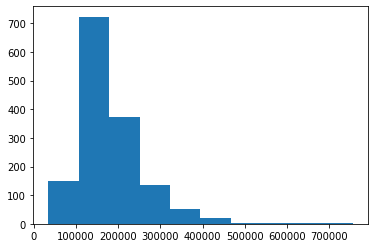

In [9]:
plt.hist(target_feature,bins=10)
plt.show()

In [10]:
#lets measure its skewness and kurtosis
import scipy
print("kurtosis: ",scipy.stats.kurtosis(target_feature))
print("skewness: ",scipy.stats.skew(target_feature))

kurtosis:  6.509812011089439
skewness:  1.880940746034036


In [11]:
#is there any way we can reduce skewness and kurtosis?
#We can try log transform
import math
log_target_feature=np.log(target_feature)

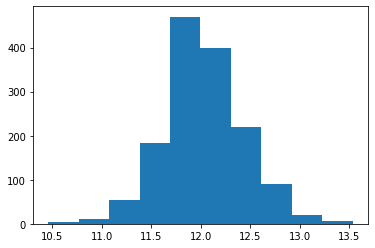

new kurtosis:  0.8026555069117713
new skewness:  0.1212103673013655


In [12]:
plt.hist(log_target_feature)
plt.show()
print("new kurtosis: ",scipy.stats.kurtosis(log_target_feature))
print("new skewness: ",scipy.stats.skew(log_target_feature))

In [13]:
num_feature=[]
cat_feature=[]
for feature in df_train.columns:
    if(df_train[feature].dtype=='int64'):
        num_feature.append(feature)
    if(df_train[feature].dtype=='float64'):
        num_feature.append(feature)
    if(df_train[feature].dtype=='O'):
        cat_feature.append(feature)

In [14]:
cat_ordinal_feature=[]
year_feature=[]
cat_nominal_feature=[]

In [15]:
num_feature.remove("MSSubClass")#either categorical nominal or ordinal
num_feature.remove("OverallQual")##categorical_ordinal feature
num_feature.remove("OverallCond")##cat_ordinal
cat_feature.append("MSSubClass")
cat_feature.append("OverallQual")
cat_feature.append("OverallCond")
for feature in num_feature:
    if("Yr" in feature or "Year" in feature):
        year_feature.append(feature)
        num_feature.remove(feature)


In [16]:
f=open('data_description.txt','r')
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [17]:
cat_ordinal_feature.append("LotShape")
cat_ordinal_feature.append("LandSlope")
cat_ordinal_feature.append("OverallQual")
cat_ordinal_feature.append("OverallCond")
cat_ordinal_feature.append("ExterQual")
cat_ordinal_feature.append("ExterCond")
cat_ordinal_feature.append("BsmtQual")
cat_ordinal_feature.append("BsmtCond")
cat_ordinal_feature.append("BsmtExposure")
cat_ordinal_feature.append("BsmtFinType1")
cat_ordinal_feature.append("BsmtFinType2")
cat_ordinal_feature.append("HeatingQC")
cat_ordinal_feature.append("KitchenQual")
cat_ordinal_feature.append("Functional")
cat_ordinal_feature.append("FireplaceQu")
cat_ordinal_feature.append("GarageFinish")
cat_ordinal_feature.append("GarageQual")
cat_ordinal_feature.append("GarageCond")
cat_ordinal_feature.append("PoolQC")
cat_ordinal_feature.append("Fence")
cat_ordinal_feature.append("LotShape")








In [18]:
for feature in cat_feature:
    if feature not in cat_ordinal_feature:
        cat_nominal_feature.append(feature)

# Numerical univariate analysis

C:\Users\manis\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\manis\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


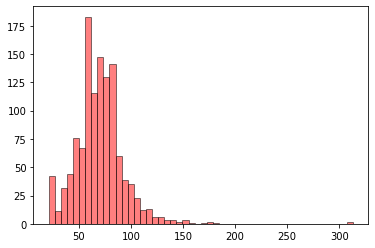

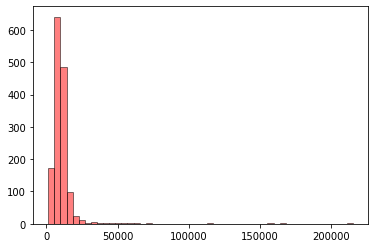

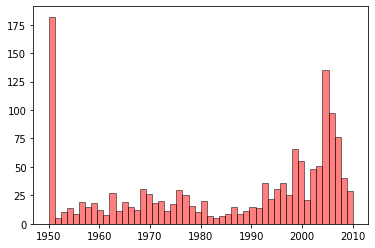

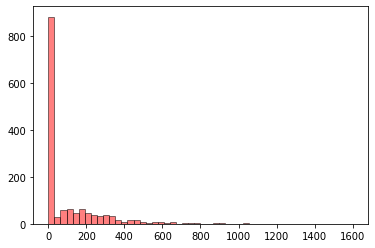

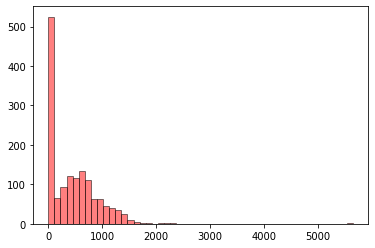

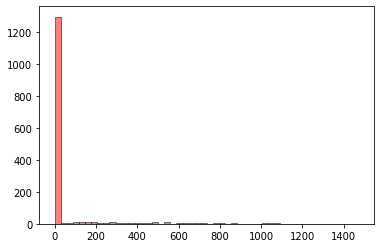

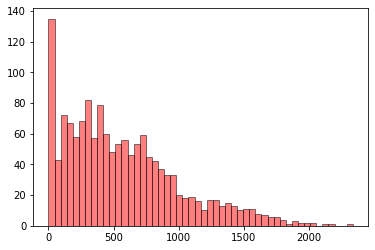

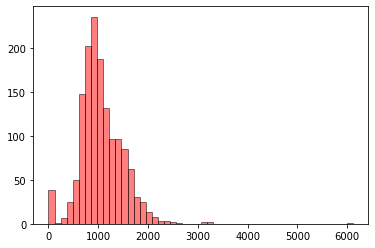

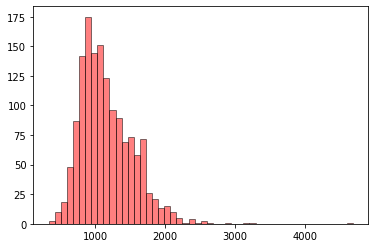

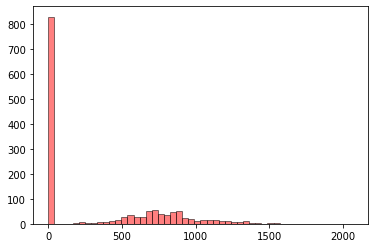

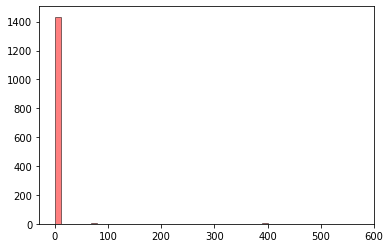

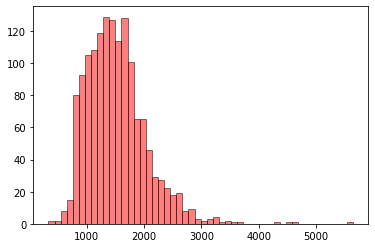

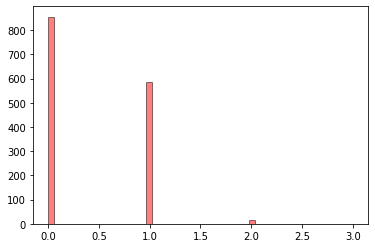

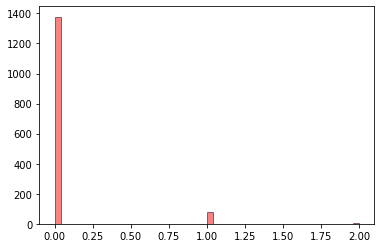

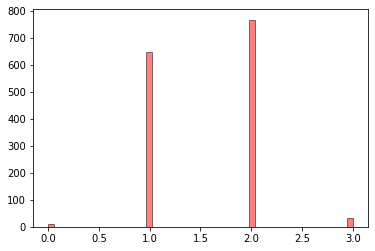

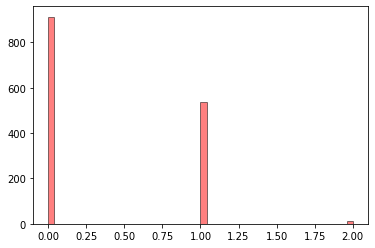

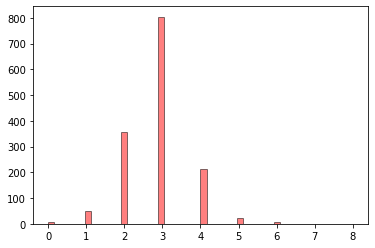

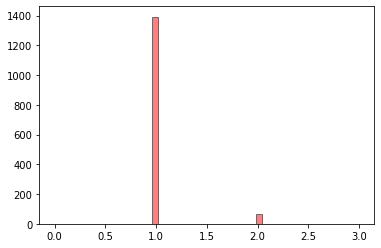

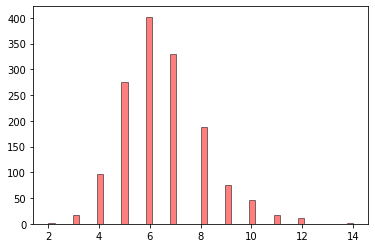

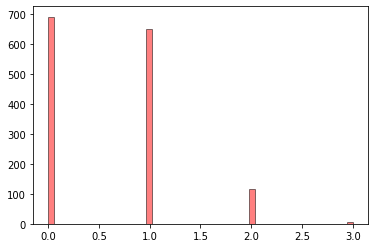

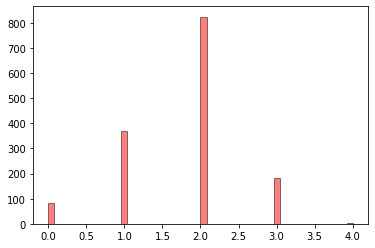

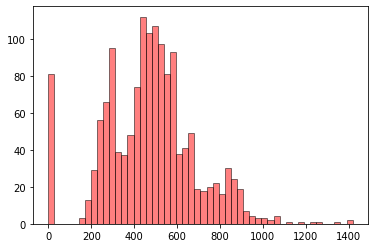

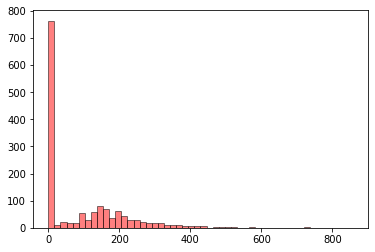

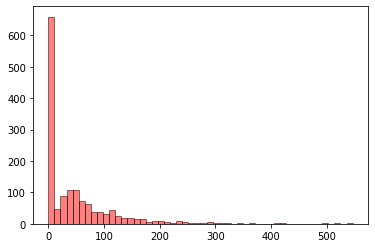

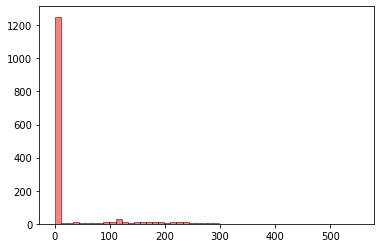

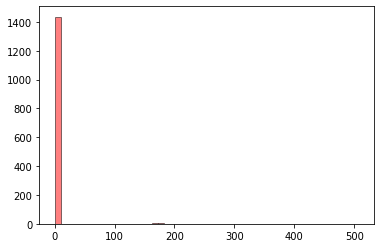

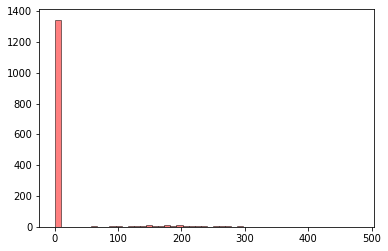

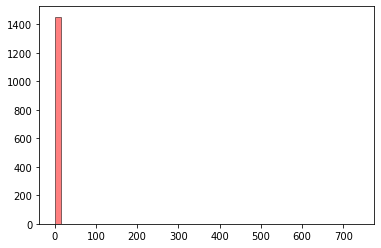

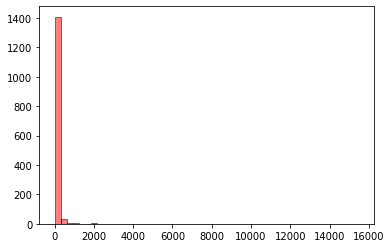

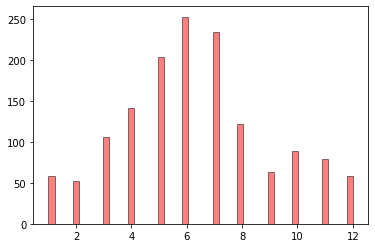

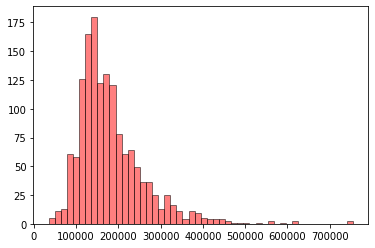

In [19]:
for feature in num_feature:
    plt.hist(df_train[feature],color='r',alpha=0.5,bins=50,ec='black')
    plt.show()

In [20]:
#calculate skewness and kurtosis of all num_feature
for feature in num_feature:
    print(feature+" " "kurtosis: "+str(scipy.stats.kurtosis(df_train[feature]))+" "+"skewness: "+str(scipy.stats.skew(df_train[feature])))

LotFrontage kurtosis: nan skewness: nan
LotArea kurtosis: 202.5437927513529 skewness: 12.195142125084478
YearRemodAdd kurtosis: -1.2719991404772555 skewness: -0.5030444967597948
MasVnrArea kurtosis: nan skewness: nan
BsmtFinSF1 kurtosis: 11.076089857631942 skewness: 1.6837708962341815
BsmtFinSF2 kurtosis: 20.04041549471293 skewness: 4.250888017057445
BsmtUnfSF kurtosis: 0.4692620789683075 skewness: 0.9193227015582005
TotalBsmtSF kurtosis: 13.201041630635025 skewness: 1.522688086978629
1stFlrSF kurtosis: 5.722076026587489 skewness: 1.3753417421837937
2ndFlrSF kurtosis: -0.5556767272864769 skewness: 0.8121942731961613
LowQualFinSF kurtosis: 82.945932358931 skewness: 9.002080417658552
GrLivArea kurtosis: 4.874265760253215 skewness: 1.365155954773434
BsmtFullBath kurtosis: -0.8403341716305701 skewness: 0.5954540376067279
BsmtHalfBath kurtosis: 16.33643610470807 skewness: 4.0991856695420035
FullBath kurtosis: -0.8582173323828637 skewness: 0.0365239844325461
HalfBath kurtosis: -1.07734948800

BsmtUnfSF
0.9193227015582005
0.4692620789683075


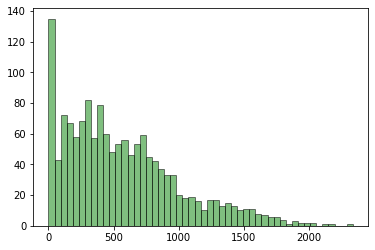

2ndFlrSF
0.8121942731961613
-0.5556767272864769


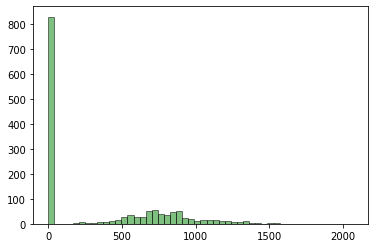

BsmtFullBath
0.5954540376067279
-0.8403341716305701


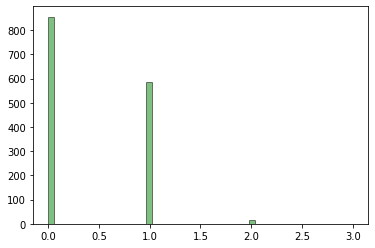

FullBath
0.0365239844325461
-0.8582173323828637


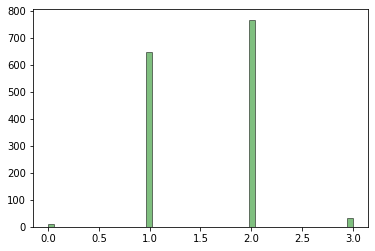

TotRmsAbvGrd
0.6756457673102017
0.8736413737415689


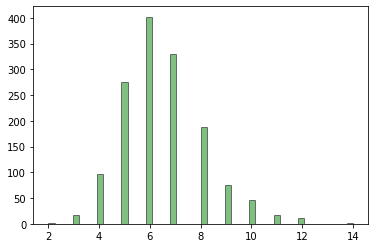

Fireplaces
0.6488976310170327
-0.2206007337098992


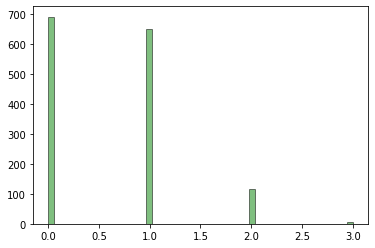

GarageCars
-0.34219689543081294
0.2161348715110729


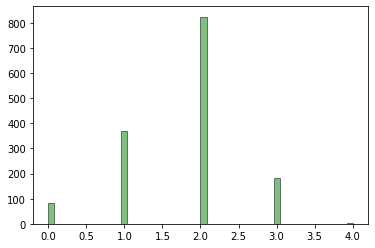

GarageArea
0.1797959420587727
0.9098227950882034


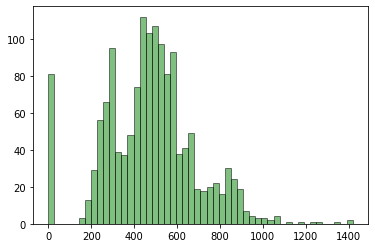

MoSold
0.2118350601903434
-0.40683350802995655


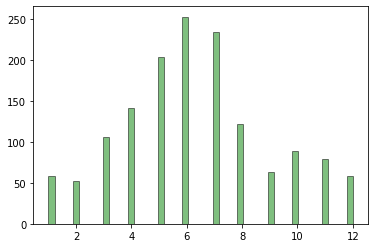

In [21]:
#finding almost normally distributed feature
normal_feature=[]
for feature in num_feature:
    kurtosis=scipy.stats.kurtosis(df_train[feature])
    skew=scipy.stats.kurtosis(df_train[feature])
    if (skew>-1 and skew<1):
        if (kurtosis>-2 and kurtosis<2):
            normal_feature.append(feature)
for feature in normal_feature:
    print(feature)
    print(scipy.stats.skew(df_train[feature]))
    print(scipy.stats.kurtosis(df_train[feature]))
    plt.hist(df_train[feature],color='g',alpha=0.5,bins=50,ec='black')
    plt.show()

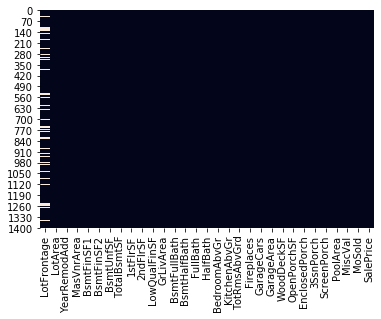

In [22]:
sns.heatmap(df_train[num_feature].isnull(),cbar=False)

In [23]:
null_num={}
for feature in num_feature:
    null_value=df_train[feature].isnull().sum()
    null_perc=(null_value/len(df_train[feature]))*100
    null_num[feature]=null_perc

In [24]:
zscore={}
for feature in num_feature:
    if(df_train[feature].isnull().sum()==0):
        zscore[feature]=scipy.stats.zscore(df_train[feature])
        

In [25]:
outliers={}
for key in zscore:
        outliers[key]=(((zscore[key]>3).sum()+(zscore[key]<-3).sum())/len(df_train[key]))*100


## Categorical Univariate Analaysis

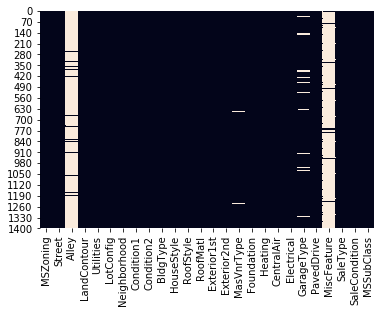

In [26]:
#finding null values
sns.heatmap(df_train[cat_nominal_feature].isnull(),cbar=False)

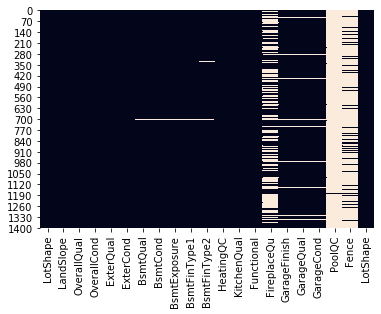

In [27]:
sns.heatmap(df_train[cat_ordinal_feature].isnull(),cbar=False)

In [28]:
null_cat={}
null_cat["nominal"]={}
null_cat["ordinal"]={}

In [29]:
for feature in cat_feature:
    if feature in cat_ordinal_feature:
        null_cat["ordinal"][feature]=(df_train[feature].isnull().sum()/len(df_train[feature]))*100
    else:
        null_cat["nominal"][feature]=(df_train[feature].isnull().sum()/len(df_train[feature]))*100

In [30]:
y=df_train[cat_ordinal_feature[0]].value_counts().to_list()
x=df_train[cat_ordinal_feature[0]].value_counts().index.to_list()

LotShape


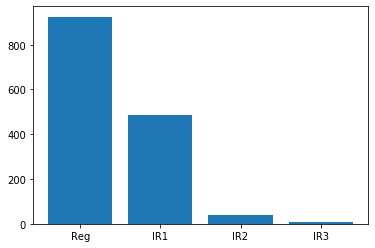

LandSlope


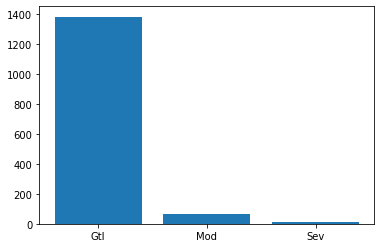

OverallQual


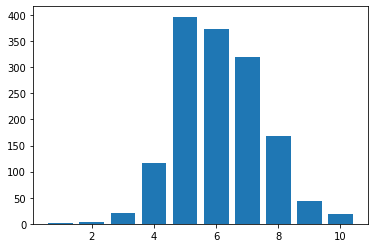

OverallCond


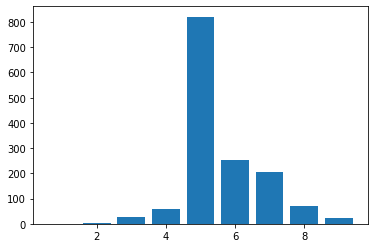

ExterQual


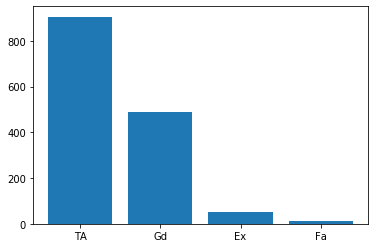

ExterCond


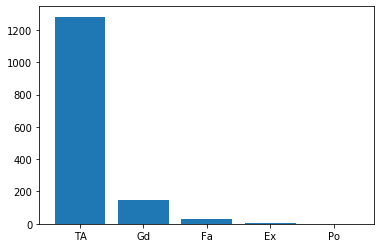

BsmtQual


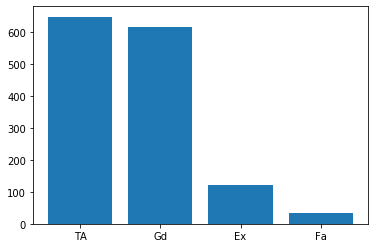

BsmtCond


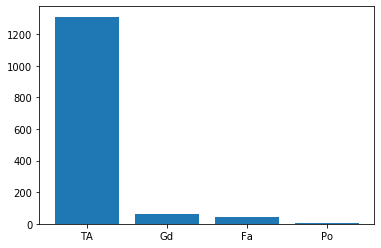

BsmtExposure


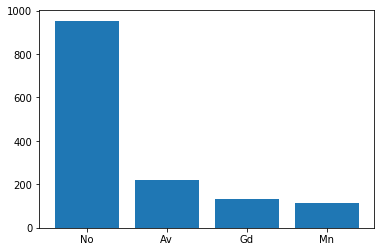

BsmtFinType1


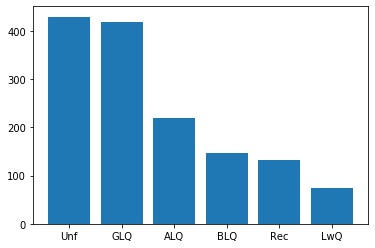

BsmtFinType2


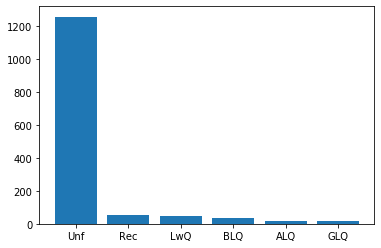

HeatingQC


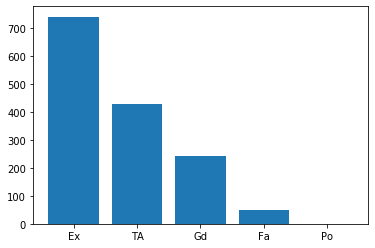

KitchenQual


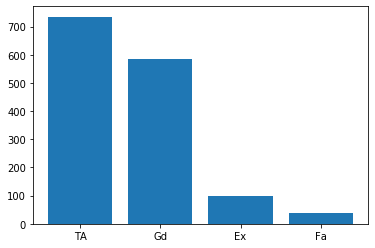

Functional


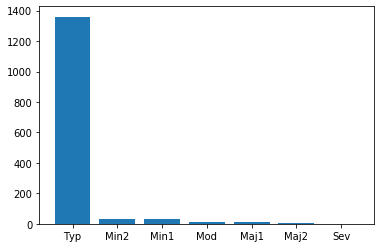

FireplaceQu


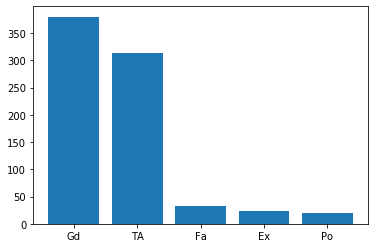

GarageFinish


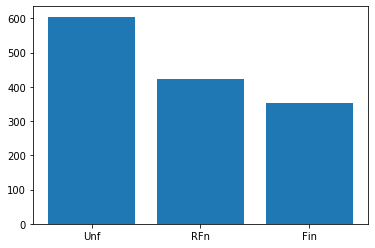

GarageQual


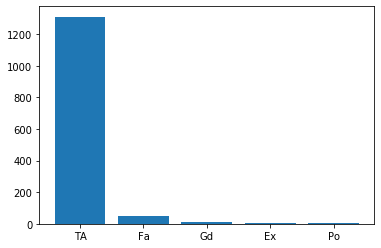

GarageCond


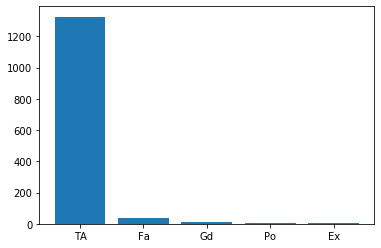

PoolQC


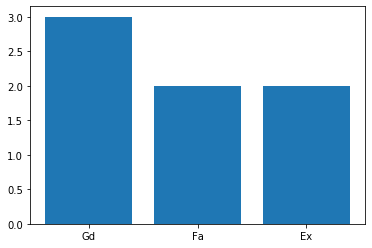

Fence


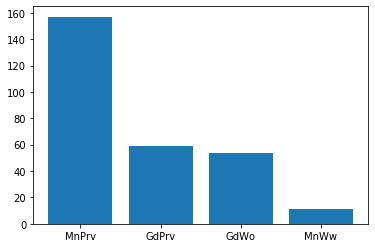

LotShape


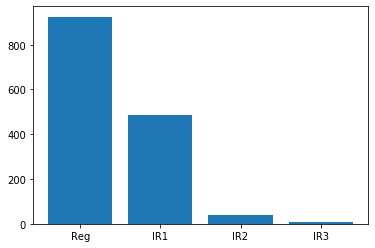

In [31]:
#visualising categories within feature
for feature in cat_ordinal_feature:
    print(feature)
    y=df_train[feature].value_counts().to_list()
    x=df_train[feature].value_counts().index.to_list()
    plt.bar(x,y)
    plt.show()

MSZoning


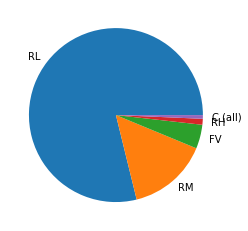

Street


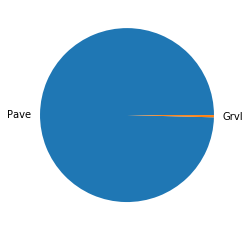

Alley


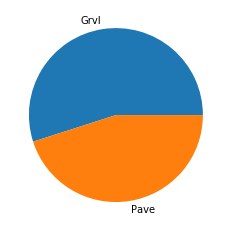

LandContour


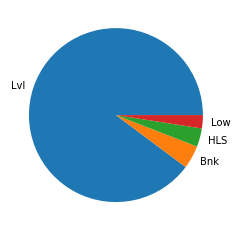

Utilities


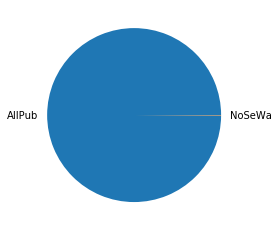

LotConfig


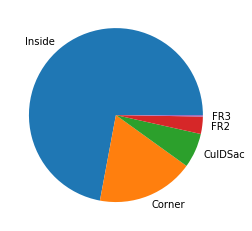

Neighborhood


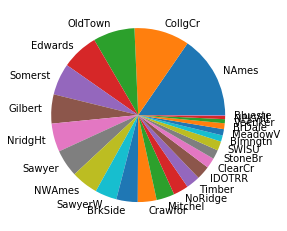

Condition1


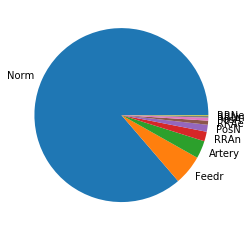

Condition2


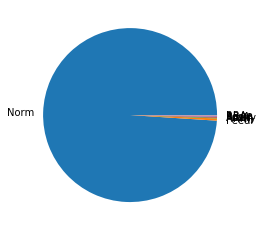

BldgType


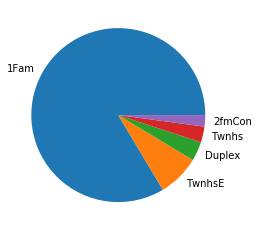

HouseStyle


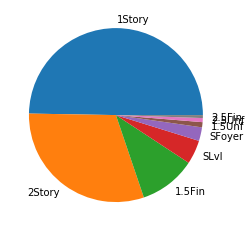

RoofStyle


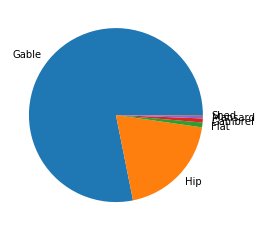

RoofMatl


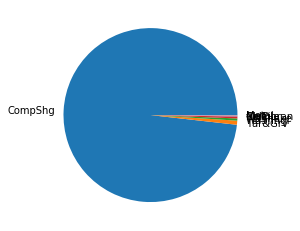

Exterior1st


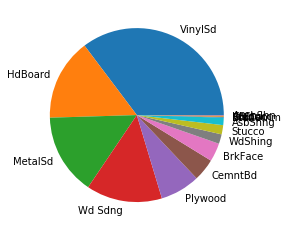

Exterior2nd


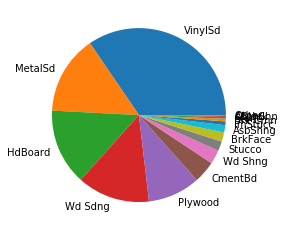

MasVnrType


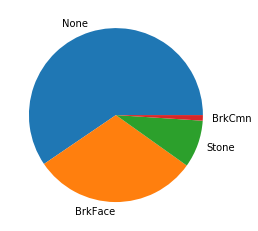

Foundation


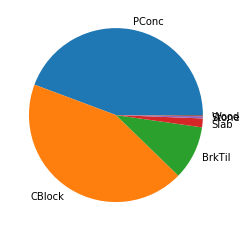

Heating


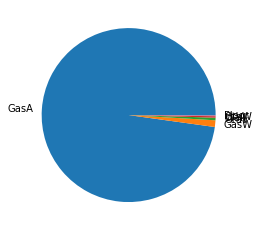

CentralAir


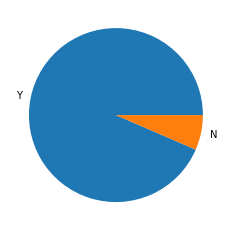

Electrical


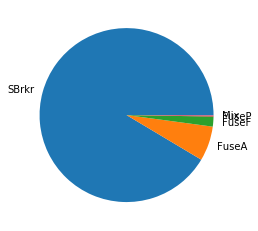

GarageType


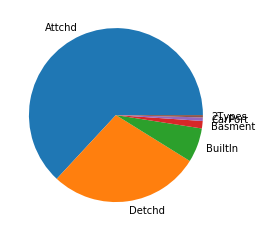

PavedDrive


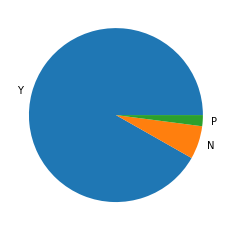

MiscFeature


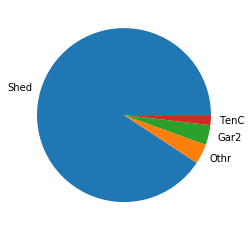

SaleType


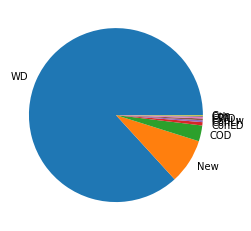

SaleCondition


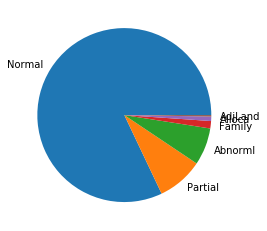

MSSubClass


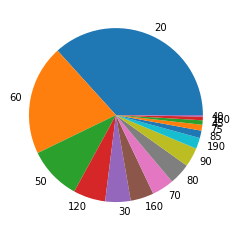

In [32]:
for feature in cat_nominal_feature:
    y=df_train[feature].value_counts().to_list()
    x=df_train[feature].value_counts().index.to_list()
    print(feature)
    plt.pie(y,labels=x)
    plt.show()

# Bivariate Analysis

In [33]:
#Numerical vs Numerical

LotFrontage


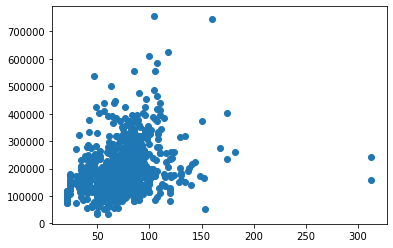

LotArea


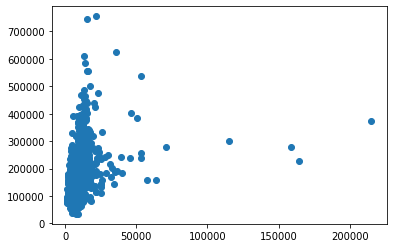

YearRemodAdd


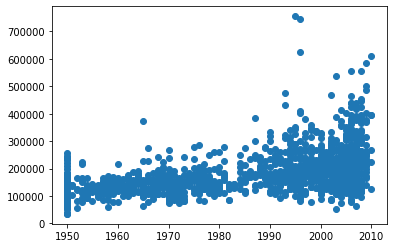

MasVnrArea


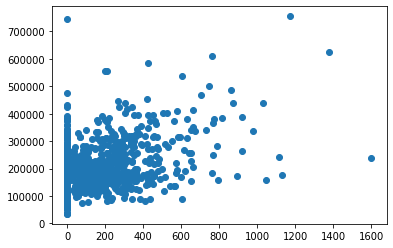

BsmtFinSF1


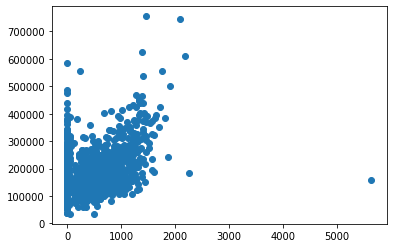

BsmtFinSF2


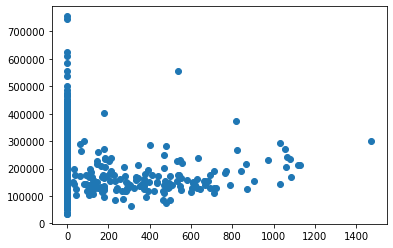

BsmtUnfSF


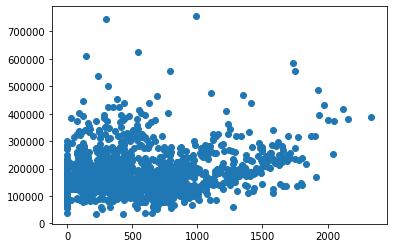

TotalBsmtSF


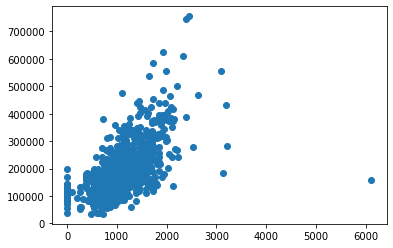

1stFlrSF


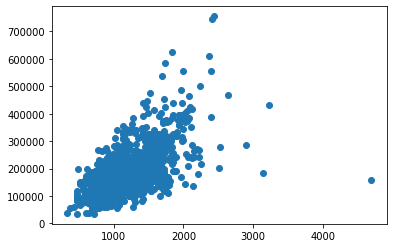

2ndFlrSF


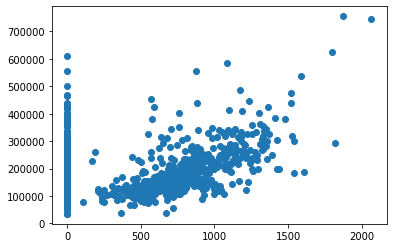

LowQualFinSF


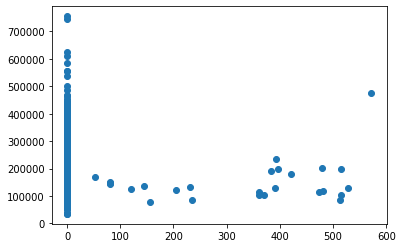

GrLivArea


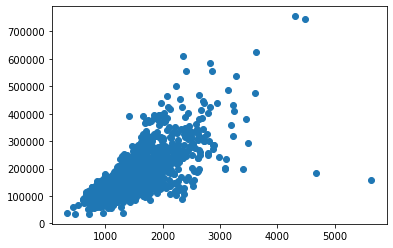

BsmtFullBath


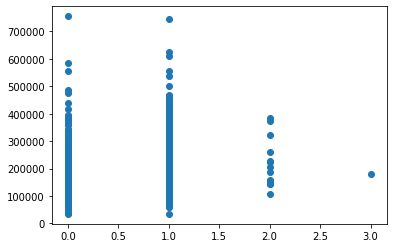

BsmtHalfBath


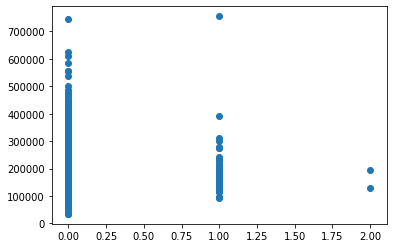

FullBath


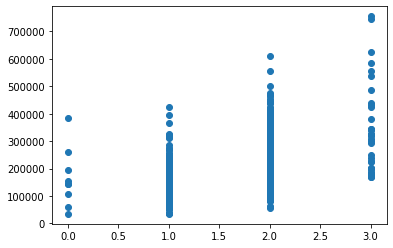

HalfBath


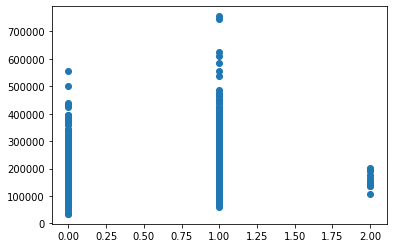

BedroomAbvGr


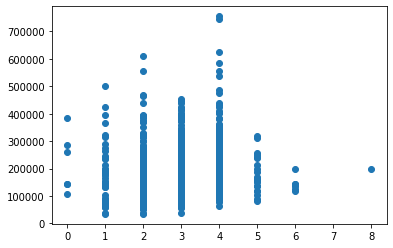

KitchenAbvGr


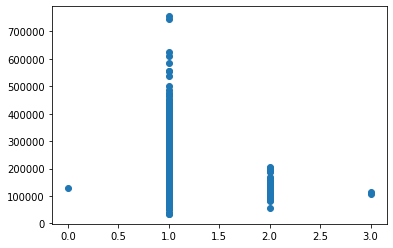

TotRmsAbvGrd


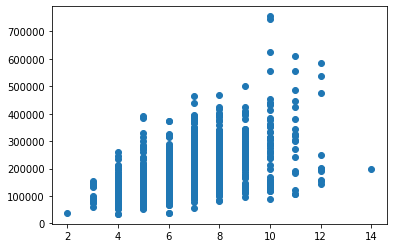

Fireplaces


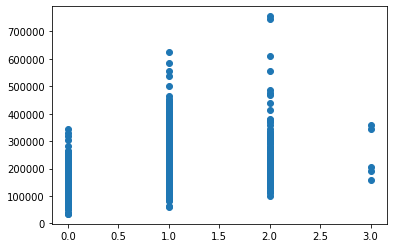

GarageCars


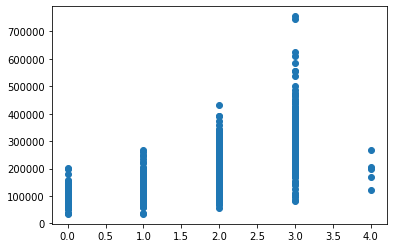

GarageArea


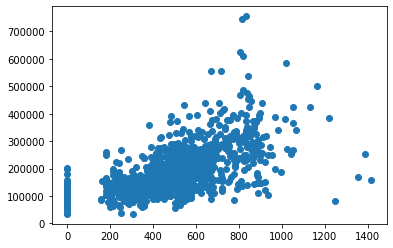

WoodDeckSF


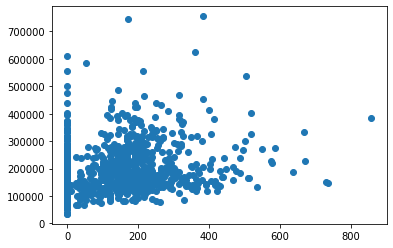

OpenPorchSF


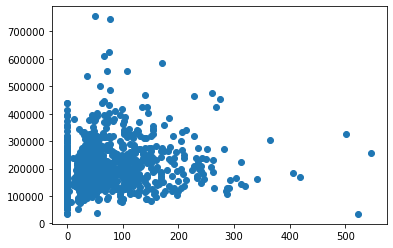

EnclosedPorch


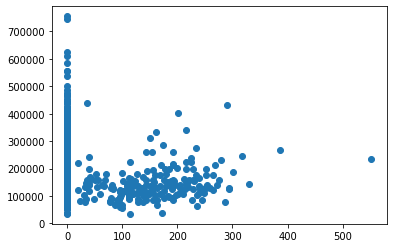

3SsnPorch


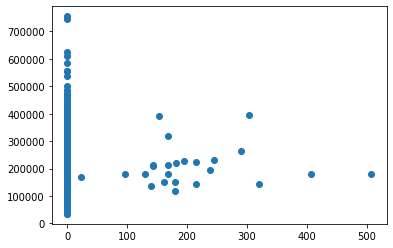

ScreenPorch


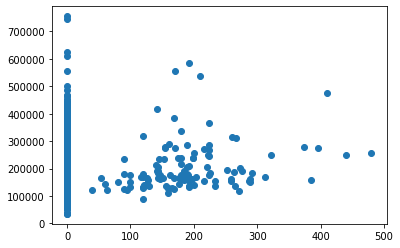

PoolArea


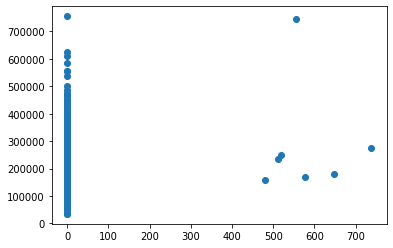

MiscVal


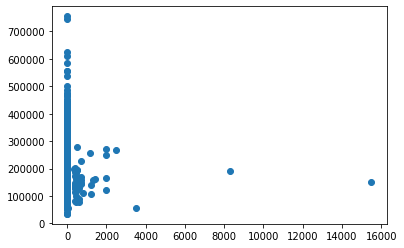

MoSold


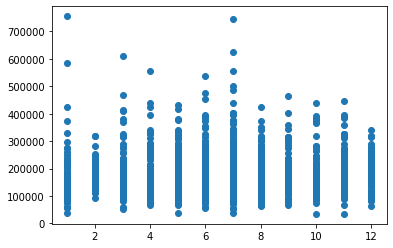

SalePrice


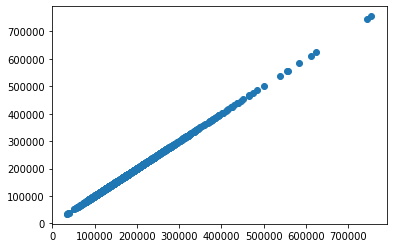

In [34]:
for feature in num_feature:
    y_axis=target_feature
    x_axis=df_train[feature]
    print(feature)
    plt.scatter(x=x_axis,y=y_axis)
    plt.show()

In [35]:
##finding spearman coefficient as our dependent variables are not normally distributed
spearman={}
for feature in num_feature:
    if(df_train[feature].isnull().sum()>0):
        df_train[feature].dropna()
    spearman_coeff=scipy.stats.spearmanr(df_train[feature],target_feature)
    if(spearman_coeff[0]>0.6) or (spearman_coeff[0]<-0.6):
        spearman[feature]=spearman_coeff[0]

In [36]:
num_significant_feature=[]
for key in spearman:
    num_significant_feature.append(key)

In [37]:
#categoricalvsnumerical

LotShape


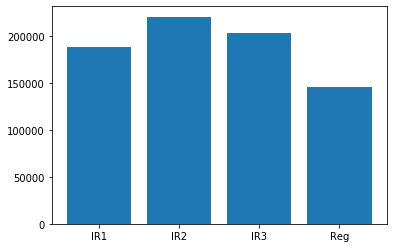

LandSlope


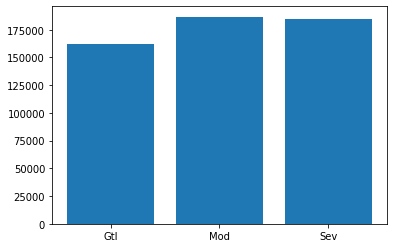

OverallQual


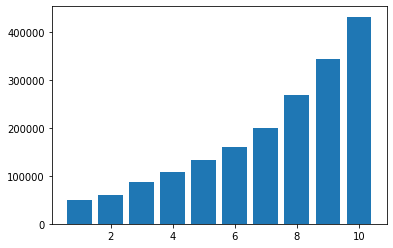

OverallCond


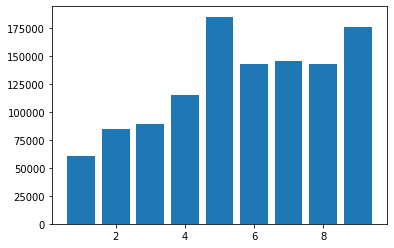

ExterQual


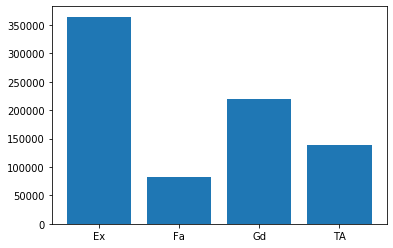

ExterCond


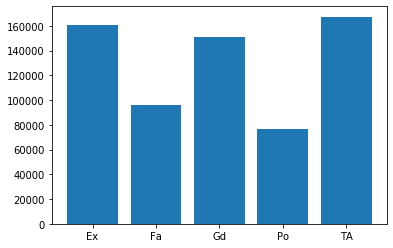

BsmtQual


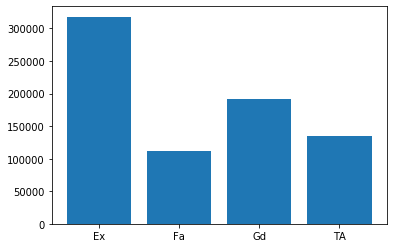

BsmtCond


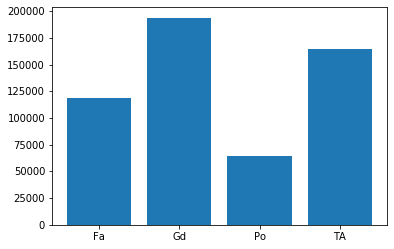

BsmtExposure


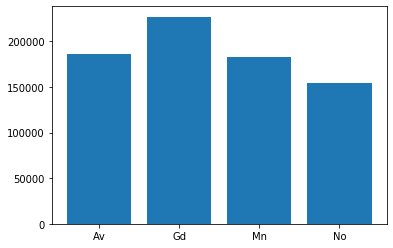

BsmtFinType1


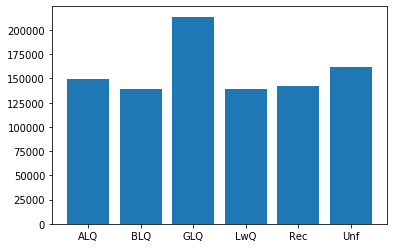

BsmtFinType2


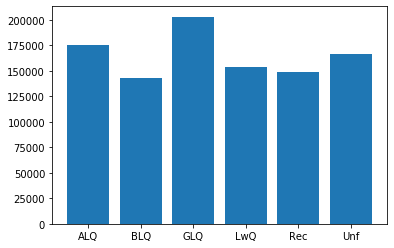

HeatingQC


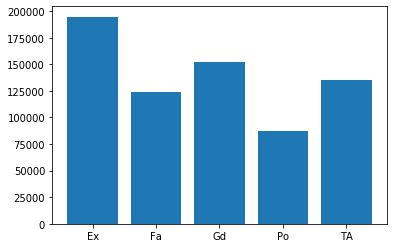

KitchenQual


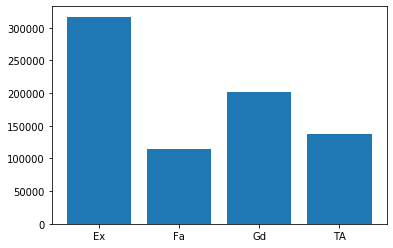

Functional


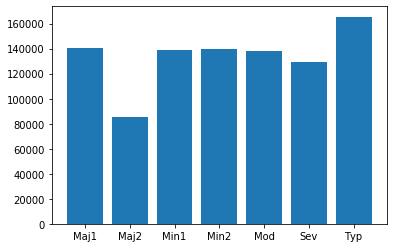

FireplaceQu


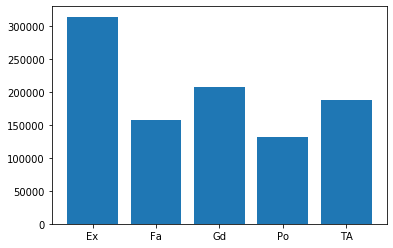

GarageFinish


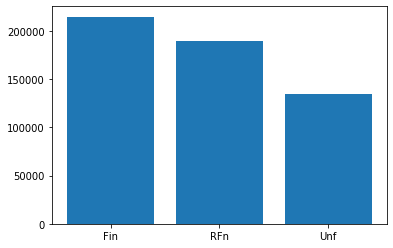

GarageQual


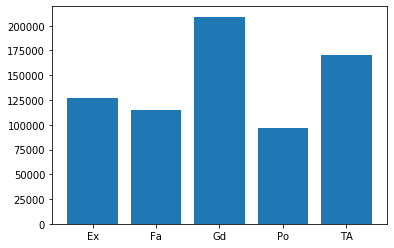

GarageCond


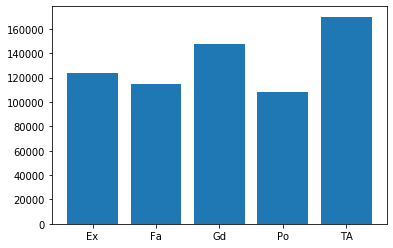

PoolQC


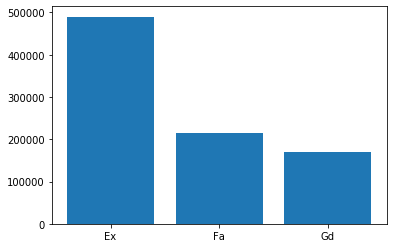

Fence


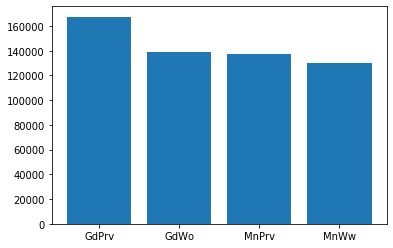

LotShape


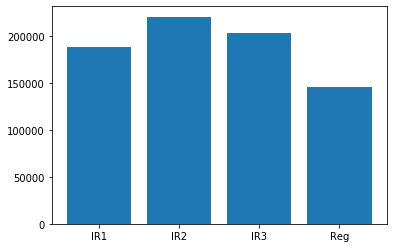

In [38]:
df_train[cat_ordinal_feature]
for feature in cat_ordinal_feature:
    database=df_train.copy()
    database[feature].dropna(inplace=True)
    y_axis=database["SalePrice"].groupby(database[feature]).median().to_list()
    x_axis=database["SalePrice"].groupby(database[feature]).median().index.to_list()
    print(feature)
    plt.bar(x_axis,y_axis)
    plt.show()

In [39]:
cat_ordinal_significant_feature=["OverallQual","GarageFinish","PoolQC"]#just an observation

MSZoning


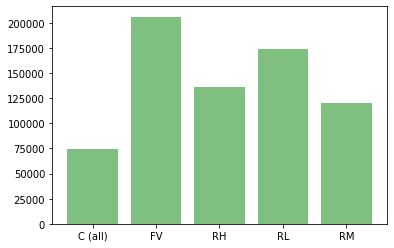

Street


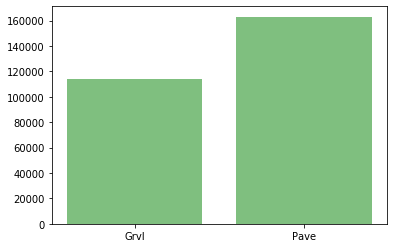

Alley


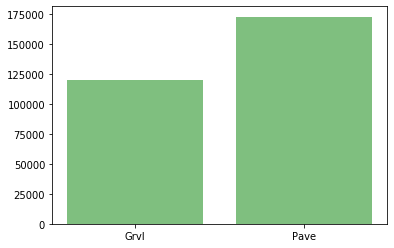

LandContour


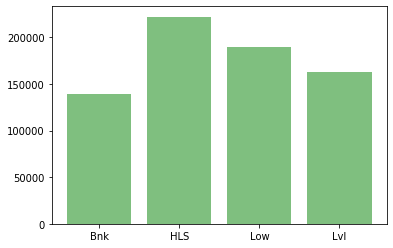

Utilities


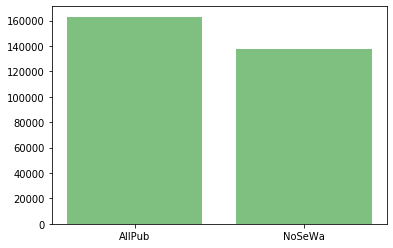

LotConfig


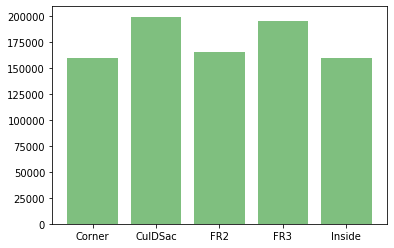

Neighborhood


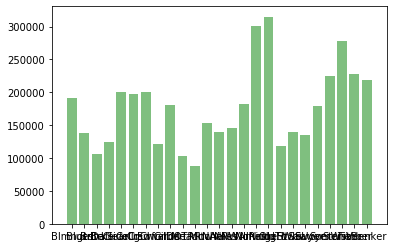

Condition1


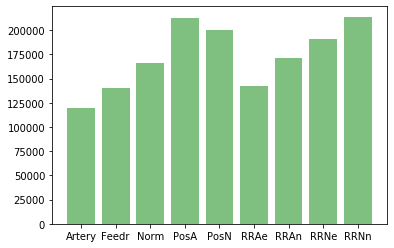

Condition2


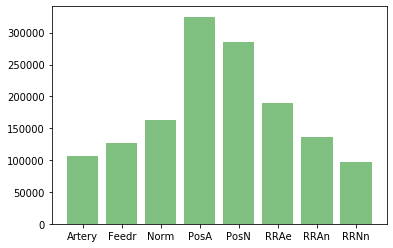

BldgType


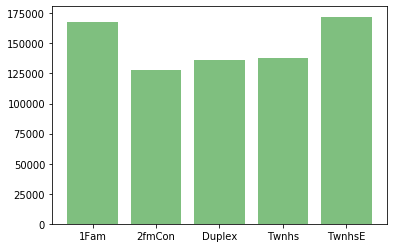

HouseStyle


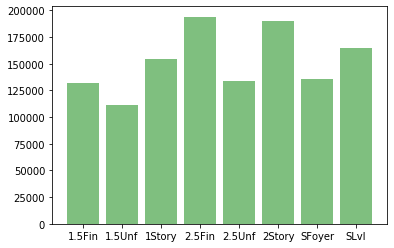

RoofStyle


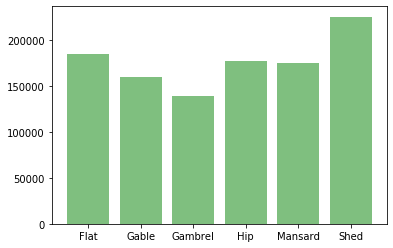

RoofMatl


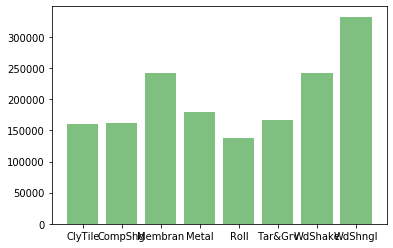

Exterior1st


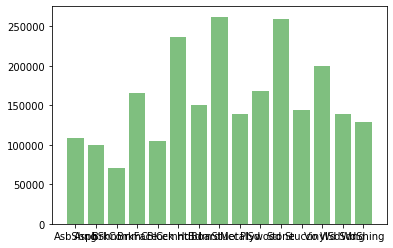

Exterior2nd


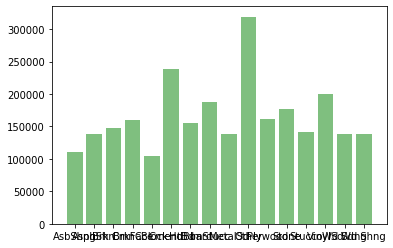

MasVnrType


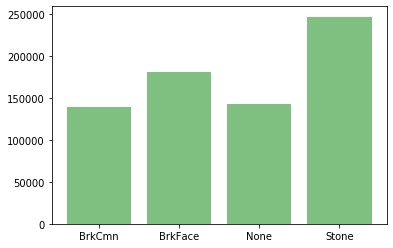

Foundation


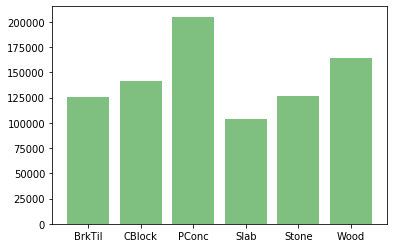

Heating


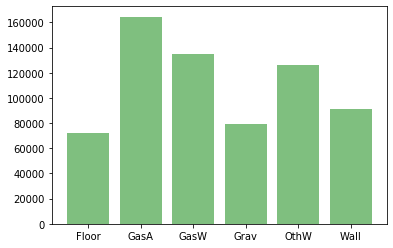

CentralAir


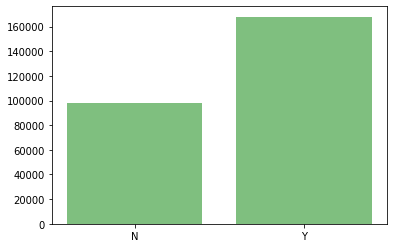

Electrical


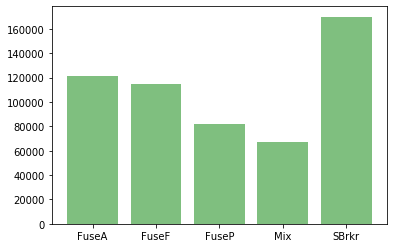

GarageType


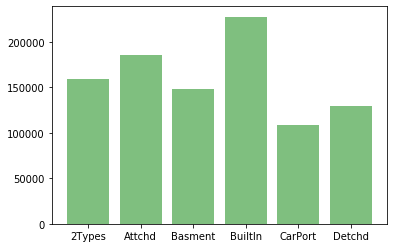

PavedDrive


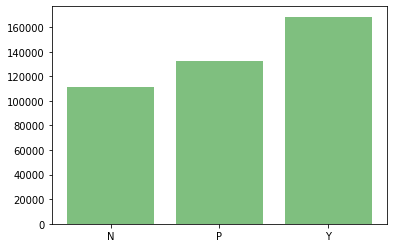

MiscFeature


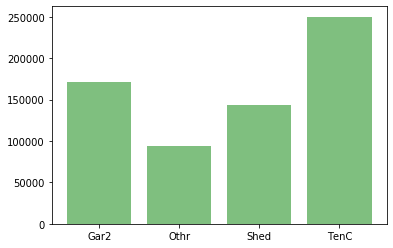

SaleType


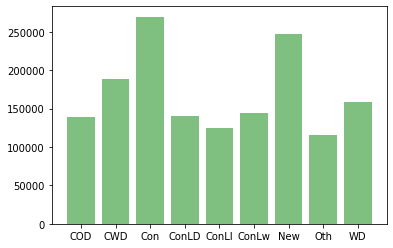

SaleCondition


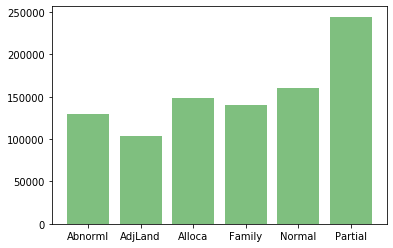

MSSubClass


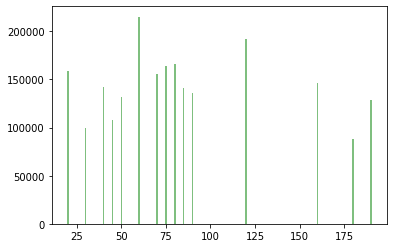

In [40]:
for feature in cat_nominal_feature:
    database=df_train.copy()
    y_axis=database['SalePrice'].groupby(database[feature]).median().to_list()
    x_axis=database["SalePrice"].groupby(database[feature]).median().index.to_list()
    print(feature)
    plt.bar(x_axis,y_axis,color='g',alpha=0.5)
    plt.show()
cat_nominal_significant_feature=["PavedDrive","CentralAir","Alley"]#by simple observation
    

In [41]:
anova_dict_ord={}
anova_dict_nom={}
for feature in cat_ordinal_significant_feature:
    grp=df_train['SalePrice'].groupby(df_train[feature])
    arr=[]
    for index in df_train[feature].value_counts().index.to_list():
        grp_arr=grp.get_group(index)
        arr.append(grp_arr)
    anova_dict_ord[feature]=arr
for feature in cat_nominal_significant_feature:
    grp=df_train['SalePrice'].groupby(df_train[feature])
    arr=[]
    for index in df_train[feature].value_counts().index.to_list():
        grp_arr=grp.get_group(index)
        arr.append(grp_arr)
    anova_dict_nom[feature]=arr
        

In [42]:
#Perform anova on overall feature
anova_dict_ord.keys()

dict_keys(['OverallQual', 'GarageFinish', 'PoolQC'])

In [43]:
len(anova_dict_ord['OverallQual'])
in_arr=anova_dict_ord['OverallQual']
scipy.stats.f_oneway(in_arr[0],in_arr[1],in_arr[2],in_arr[3],in_arr[4],in_arr[5],in_arr[6],in_arr[7],in_arr[8],in_arr[9])
#OverallQual is an important feature

F_onewayResult(statistic=349.0268395693078, pvalue=0.0)

In [44]:
year_feature.append("YearRemodAdd")

YearBuilt


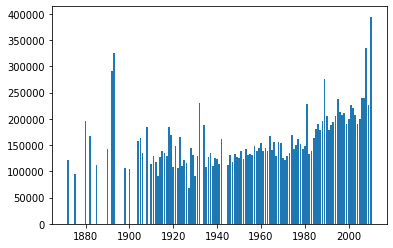

GarageYrBlt


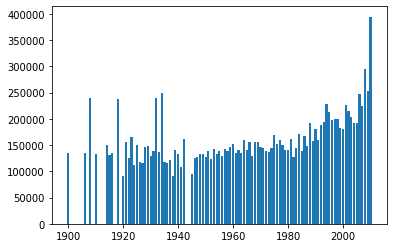

YrSold


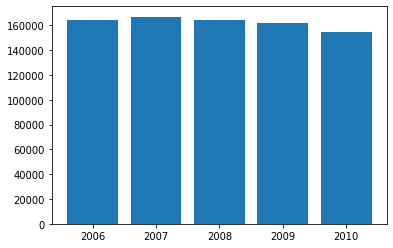

YearRemodAdd


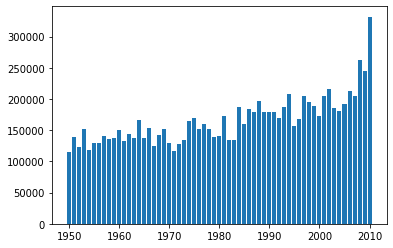

In [45]:
for feature in year_feature:
    print(feature)
    y=df_train['SalePrice'].groupby(df_train[feature]).median().to_list()
    x=df_train['SalePrice'].groupby(df_train[feature]).median().index.to_list()
    plt.bar(x,y)
    plt.show()
#No significant feature from year except YearRemodAdd
year_significant_feature=['YearRemodAdd']

# Handling nan values

{'LotFrontage': 17.73972602739726,
 'LotArea': 0.0,
 'YearRemodAdd': 0.0,
 'MasVnrArea': 0.547945205479452,
 'BsmtFinSF1': 0.0,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': 0.0,
 'GrLivArea': 0.0,
 'BsmtFullBath': 0.0,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.0,
 'HalfBath': 0.0,
 'BedroomAbvGr': 0.0,
 'KitchenAbvGr': 0.0,
 'TotRmsAbvGrd': 0.0,
 'Fireplaces': 0.0,
 'GarageCars': 0.0,
 'GarageArea': 0.0,
 'WoodDeckSF': 0.0,
 'OpenPorchSF': 0.0,
 'EnclosedPorch': 0.0,
 '3SsnPorch': 0.0,
 'ScreenPorch': 0.0,
 'PoolArea': 0.0,
 'MiscVal': 0.0,
 'MoSold': 0.0,
 'SalePrice': 0.0}

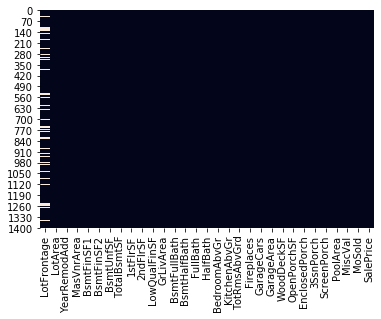

In [46]:
sns.heatmap(df_train[num_feature].isnull(),cbar=False)
null_num

In [47]:
df_c_train=df_train.copy()
df_c_test=df_test.copy()

In [48]:
df_c_train['LotFrontage']=df_c_train['LotFrontage'].fillna(df_c_train['LotFrontage'].dropna().median())

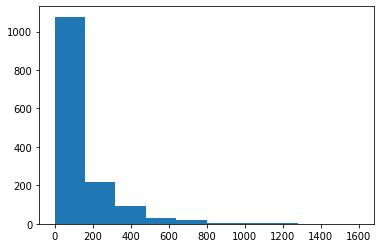

In [49]:
plt.hist(df_train['MasVnrArea'])
df_c_train['MasVnrArea']=df_c_train['MasVnrArea'].fillna(df_c_train['MasVnrArea'].dropna().median())

In [50]:
df_c_test['MasVnrArea']=df_c_test['MasVnrArea'].fillna(df_c_test['MasVnrArea'].dropna().median())
df_c_test['LotFrontage']=df_c_test['LotFrontage'].fillna(df_c_test['LotFrontage'].dropna().median())

In [51]:
null_cat['ordinal']

{'LotShape': 0.0,
 'LandSlope': 0.0,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtFinType2': 2.6027397260273974,
 'HeatingQC': 0.0,
 'KitchenQual': 0.0,
 'Functional': 0.0,
 'FireplaceQu': 47.26027397260274,
 'GarageFinish': 5.5479452054794525,
 'GarageQual': 5.5479452054794525,
 'GarageCond': 5.5479452054794525,
 'PoolQC': 99.52054794520548,
 'Fence': 80.75342465753424,
 'OverallQual': 0.0,
 'OverallCond': 0.0}

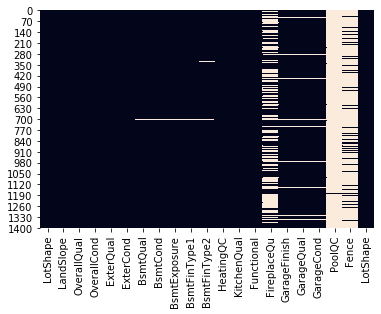

In [52]:
sns.heatmap(df_c_train[cat_ordinal_feature].isnull(),cbar=False)

In [53]:
df_c_train.drop(['PoolQC','Fence'],axis=1,inplace=True)

In [54]:
df_c_test.drop(['PoolQC','Fence'],axis=1,inplace=True)

In [55]:
cat_ordinal_feature.remove('PoolQC')
cat_ordinal_feature.remove('Fence')

<BarContainer object of 5 artists>

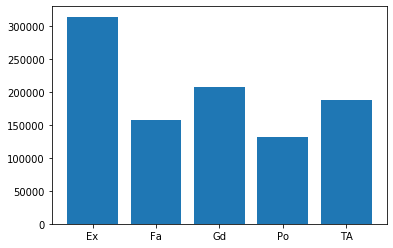

In [56]:
plt.bar(df_c_train['SalePrice'].groupby(df_c_train['FireplaceQu']).median().index.to_list(),df_c_train['SalePrice'].groupby(df_c_train['FireplaceQu']).median().to_list())

In [57]:
df_c_train['FireplaceQu']=df_c_train['FireplaceQu'].fillna("missing")#we cant make any conclusion about the missing values so we use missing to represent them

In [58]:
df_c_test['FireplaceQu']=df_c_test['FireplaceQu'].fillna("missing")

<BarContainer object of 6 artists>

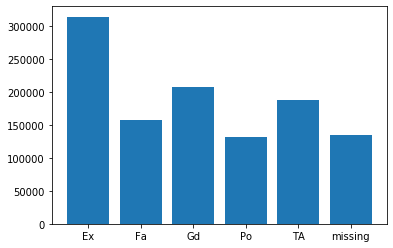

In [59]:
plt.bar(df_train['SalePrice'].groupby(df_c_train['FireplaceQu']).median().index.to_list(),df_train['SalePrice'].groupby(df_c_train['FireplaceQu']).median().to_list())

In [60]:
df_dummy1=df_c_train.copy()
df_dummy1['GarageFinish']=df_c_train['GarageFinish'].fillna('missing1')
df_dummy1['GarageQual']=df_c_train['GarageQual'].fillna('missing2')

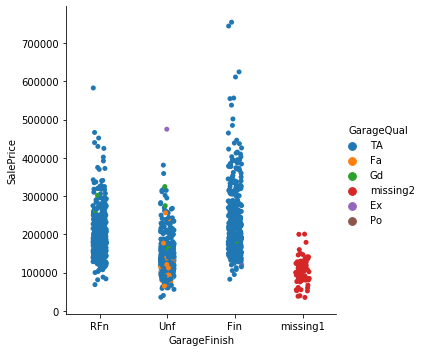

In [61]:
from numpy import median
sns.catplot(y='SalePrice',x='GarageFinish',hue='GarageQual',estimator='median',data=df_dummy1)

In [62]:
df_dummy1['SalePrice'].groupby(df_dummy1['GarageCond']).median()

GarageCond
Ex    124000
Fa    114504
Gd    148000
Po    108000
TA    170000
Name: SalePrice, dtype: int64

In [63]:
df_c_train['GarageQual']=df_c_train['GarageQual'].fillna("TA")

In [64]:
df_c_train['GarageFinish']=df_c_train['GarageFinish'].fillna("Unf")

In [65]:
df_c_train['GarageCond']=df_c_train['GarageCond'].fillna("TA")

In [66]:
df_c_test['GarageQual']=df_c_test['GarageQual'].fillna("TA")
df_c_test['GarageFinish']=df_c_test['GarageFinish'].fillna("Unf")
df_c_test['GarageCond']=df_c_test['GarageCond'].fillna("TA")

In [67]:
cat_ordinal_feature[6:11]
for feature in cat_ordinal_feature[6:11]:
    df=df_c_train.copy()
    df[feature]=df[feature].fillna('missing')
    print(feature)
    print(df[feature].value_counts())
    print(df['SalePrice'].groupby(df[feature]).median())

BsmtQual
TA         649
Gd         618
Ex         121
missing     37
Fa          35
Name: BsmtQual, dtype: int64
BsmtQual
Ex         318000
Fa         112000
Gd         192070
TA         135500
missing    101800
Name: SalePrice, dtype: int64
BsmtCond
TA         1311
Gd           65
Fa           45
missing      37
Po            2
Name: BsmtCond, dtype: int64
BsmtCond
Fa         118500
Gd         193879
Po          64000
TA         165000
missing    101800
Name: SalePrice, dtype: int64
BsmtExposure
No         953
Av         221
Gd         134
Mn         114
missing     38
Name: BsmtExposure, dtype: int64
BsmtExposure
Av         185850
Gd         226975
Mn         182450
No         154000
missing    104025
Name: SalePrice, dtype: int64
BsmtFinType1
Unf        430
GLQ        418
ALQ        220
BLQ        148
Rec        133
LwQ         74
missing     37
Name: BsmtFinType1, dtype: int64
BsmtFinType1
ALQ        149250
BLQ        139100
GLQ        213750
LwQ        139000
Rec        142000
Unf

In [68]:
df_c_train[cat_ordinal_feature[6]]=df_c_train[cat_ordinal_feature[6]].fillna('TA')
df_c_train[cat_ordinal_feature[7]]=df_c_train[cat_ordinal_feature[7]].fillna('TA')
df_c_train[cat_ordinal_feature[8]]=df_c_train[cat_ordinal_feature[8]].fillna('No')
df_c_train[cat_ordinal_feature[9]]=df_c_train[cat_ordinal_feature[9]].fillna('Unf')
df_c_train[cat_ordinal_feature[10]]=df_c_train[cat_ordinal_feature[10]].fillna('Unf')

In [69]:
df_c_test[cat_ordinal_feature[6]]=df_c_test[cat_ordinal_feature[6]].fillna('TA')
df_c_test[cat_ordinal_feature[7]]=df_c_test[cat_ordinal_feature[7]].fillna('TA')
df_c_test[cat_ordinal_feature[8]]=df_c_test[cat_ordinal_feature[8]].fillna('No')
df_c_test[cat_ordinal_feature[9]]=df_c_test[cat_ordinal_feature[9]].fillna('Unf')
df_c_test[cat_ordinal_feature[10]]=df_c_test[cat_ordinal_feature[10]].fillna('Unf')

In [70]:
cat_ordinal_feature[10]

'BsmtFinType2'

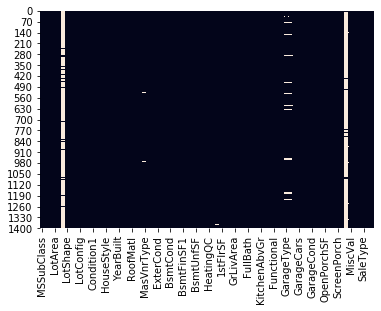

In [71]:
sns.heatmap(df_c_train.isnull(),cbar=False)

In [72]:
df_c_train.drop(['MiscFeature','Alley'],axis=1,inplace=True)

In [73]:
df_c_test.drop(['MiscFeature','Alley'],axis=1,inplace=True)

In [74]:
for feature in df_train.columns:
    if feature not in df_c_train.columns:
        print(feature)

Alley
PoolQC
Fence
MiscFeature


In [75]:
null_cat['nominal']

{'MSZoning': 0.0,
 'Street': 0.0,
 'Alley': 93.76712328767123,
 'LandContour': 0.0,
 'Utilities': 0.0,
 'LotConfig': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'MasVnrType': 0.547945205479452,
 'Foundation': 0.0,
 'Heating': 0.0,
 'CentralAir': 0.0,
 'Electrical': 0.0684931506849315,
 'GarageType': 5.5479452054794525,
 'PavedDrive': 0.0,
 'MiscFeature': 96.30136986301369,
 'SaleType': 0.0,
 'SaleCondition': 0.0,
 'MSSubClass': 0.0}

In [76]:
df_dummy2=df_c_train.copy()
df_dummy2['GarageType']=df_c_train['GarageType'].fillna('missing')

In [77]:
for features in df_dummy2:
    if 'Garage' in features:
        print(features)

GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond


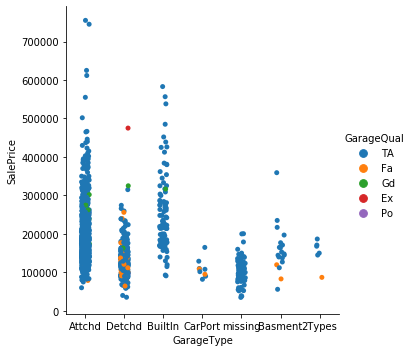

In [78]:
sns.catplot(y='SalePrice',x='GarageType',hue='GarageQual',estimator='median',data=df_dummy2)

In [79]:
pd.crosstab(df_dummy2['GarageType'],df_dummy2['GarageFinish'])

GarageFinish,Fin,RFn,Unf
GarageType,,,
2Types,1,2,3
Attchd,274,371,225
Basment,4,6,9
BuiltIn,59,24,5
CarPort,0,0,9
Detchd,14,19,354
missing,0,0,81


In [80]:
df_dummy2['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
missing     81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [81]:
df_dummy2['SalePrice'].groupby(df_dummy2['GarageType']).median()

GarageType
2Types     159000
Attchd     185000
Basment    148000
BuiltIn    227500
CarPort    108000
Detchd     129500
missing    100000
Name: SalePrice, dtype: int64

In [82]:
df_c_train['GarageType']=df_c_train['GarageType'].fillna('Detchd')##by analysing median price categorywise and frequency crosstab

In [83]:
df_c_test['GarageType']=df_c_test['GarageType'].fillna('Detchd')

In [84]:
df_c_train['MasVnrType']=df_c_train['MasVnrType'].fillna('None')##according to MasVnrArea

In [85]:
df_c_train['Electrical']=df_c_train['Electrical'].fillna(df_c_train['Electrical'].mode()[0])

In [86]:
df_c_test['MasVnrType']=df_c_test['MasVnrType'].fillna('None')
df_c_test['Electrical']=df_c_test['Electrical'].fillna(df_c_test['Electrical'].mode()[0])
df_c_test['GarageYrBlt']=df_c_test['GarageYrBlt'].fillna(df_c_test['GarageYrBlt'].dropna().median())

In [87]:
df_dummy2.GarageYrBlt=df_dummy2.GarageYrBlt.fillna('missing')

In [88]:
df_c_train['GarageYrBlt']=df_c_train['GarageYrBlt'].fillna(df_c_train['GarageYrBlt'].dropna().median())

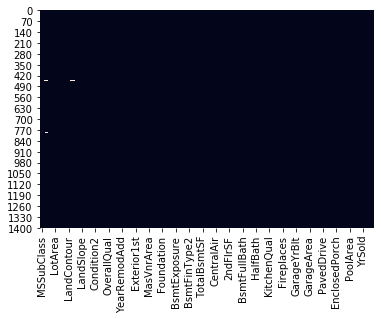

In [89]:
sns.heatmap(df_c_test.isnull(),cbar=False)

In [90]:
for feature in df_c_test:
    if(df_c_test[feature].dtype=='O'):
        df_c_test[feature]=df_c_test[feature].fillna(df_c_test[feature].mode()[0])
    else:
        df_c_test[feature]=df_c_test[feature].fillna(df_c_test[feature].median())

## Handling Outliers and less frequency categorical class

In [91]:
df_c_train[num_feature]

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,65.0,8450,2003,196.0,706,0,150,856,856,854,...,548,0,61,0,0,0,0,0,2,208500
1,80.0,9600,1976,0.0,978,0,284,1262,1262,0,...,460,298,0,0,0,0,0,0,5,181500
2,68.0,11250,2002,162.0,486,0,434,920,920,866,...,608,0,42,0,0,0,0,0,9,223500
3,60.0,9550,1970,0.0,216,0,540,756,961,756,...,642,0,35,272,0,0,0,0,2,140000
4,84.0,14260,2000,350.0,655,0,490,1145,1145,1053,...,836,192,84,0,0,0,0,0,12,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,2000,0.0,0,0,953,953,953,694,...,460,0,40,0,0,0,0,0,8,175000
1456,85.0,13175,1988,119.0,790,163,589,1542,2073,0,...,500,349,0,0,0,0,0,0,2,210000
1457,66.0,9042,2006,0.0,275,0,877,1152,1188,1152,...,252,0,60,0,0,0,0,2500,5,266500
1458,68.0,9717,1996,0.0,49,1029,0,1078,1078,0,...,240,366,0,112,0,0,0,0,4,142125


LotFrontage


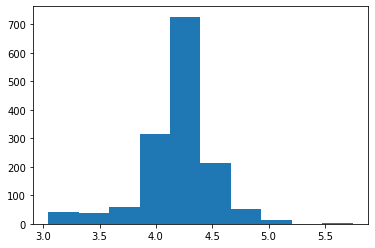

skewness from 2.4066708091473084to -0.9081805126388959
LotArea


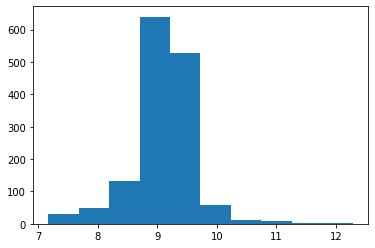

skewness from 12.195142125084478to -0.1378519937546653
YearRemodAdd


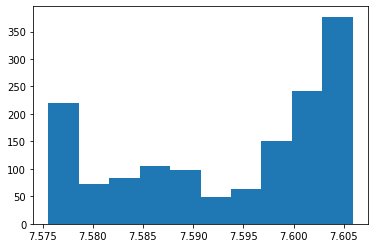

skewness from -0.5030444967597948to -0.5104839303263633
MasVnrArea


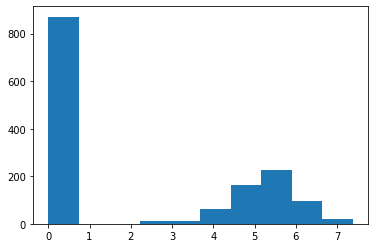

skewness from 2.6748646898037354to 0.5051370922067795
BsmtFinSF1


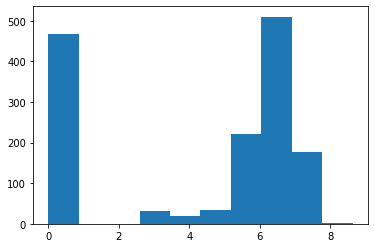

skewness from 1.6837708962341815to -0.615958525436773
BsmtFinSF2


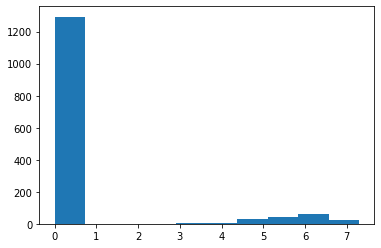

skewness from 4.250888017057445to 2.522182615453106
BsmtUnfSF


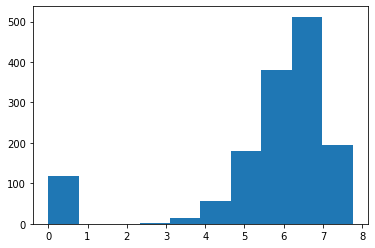

skewness from 0.9193227015582005to -2.1788047449870875
TotalBsmtSF


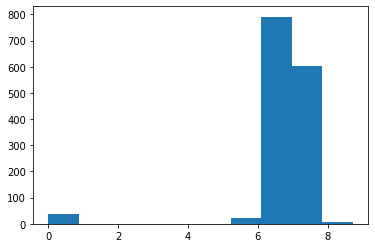

skewness from 1.522688086978629to -5.147409437126198
1stFlrSF


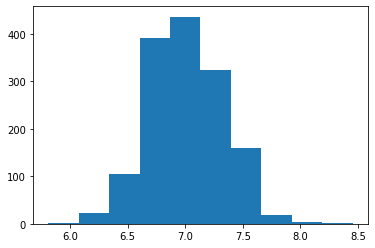

skewness from 1.3753417421837937to 0.07907560338323943
2ndFlrSF


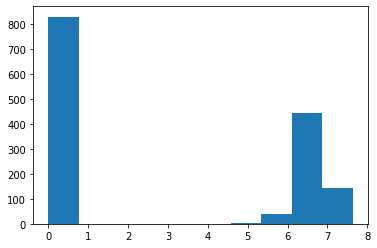

skewness from 0.8121942731961613to 0.2894030514895828
LowQualFinSF


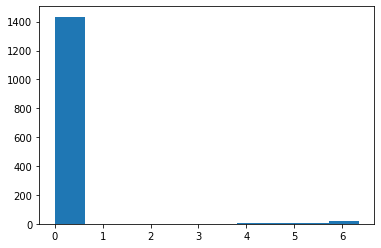

skewness from 9.002080417658552to 7.454643194110871
GrLivArea


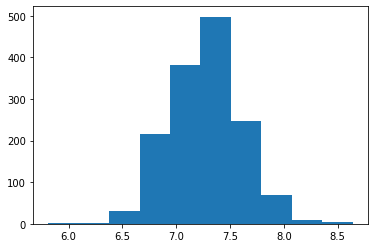

skewness from 1.365155954773434to -0.006987993304655894
BsmtFullBath


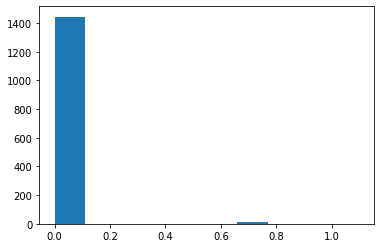

skewness from 0.5954540376067279to 9.74485203637731
BsmtHalfBath


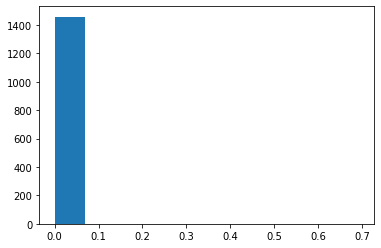

skewness from 4.0991856695420035to 26.962962962962955
FullBath


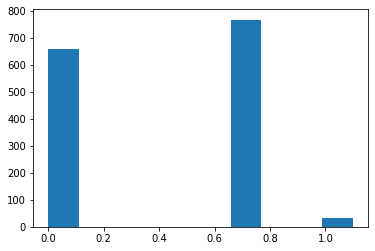

skewness from 0.0365239844325461to -0.08405250296045637
HalfBath


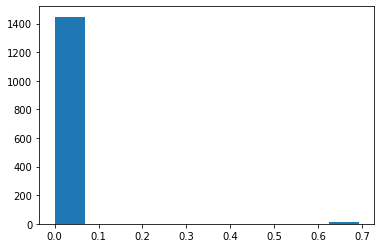

skewness from 0.6752028347742616to 10.893803466167563
BedroomAbvGr


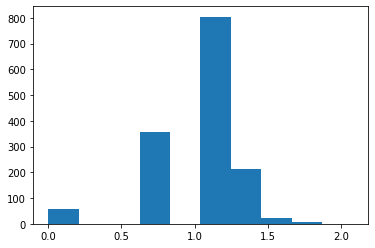

skewness from 0.21157244158228097to -1.0835211896163426
KitchenAbvGr


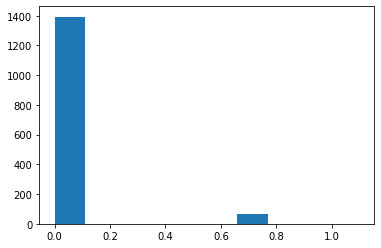

skewness from 4.483784093860484to 4.436632109819401
TotRmsAbvGrd


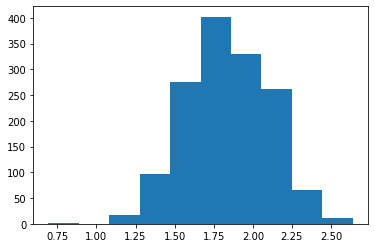

skewness from 0.6756457673102017to -0.1905500235944527
Fireplaces


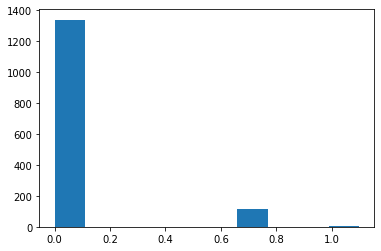

skewness from 0.6488976310170327to 3.1445130877866587
GarageCars


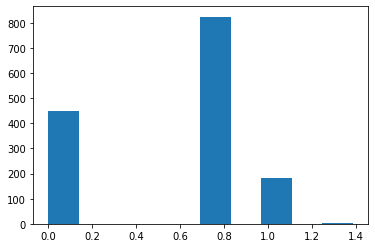

skewness from -0.34219689543081294to -0.3547332019191753
GarageArea


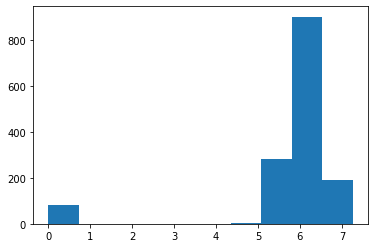

skewness from 0.1797959420587727to -3.477012742662231
WoodDeckSF


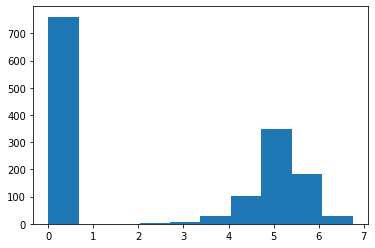

skewness from 1.5397916998042025to 0.15462150978008676
OpenPorchSF


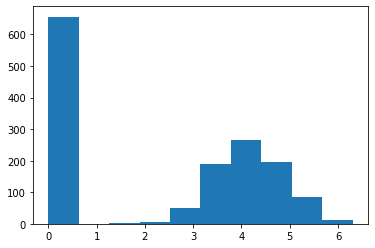

skewness from 2.361911928568972to -0.016288910340495694
EnclosedPorch


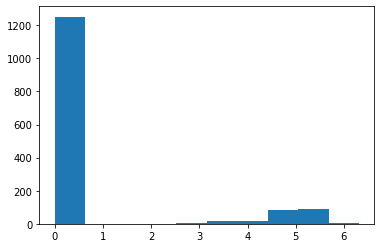

skewness from 3.086696471376678to 2.111665213791701
3SsnPorch


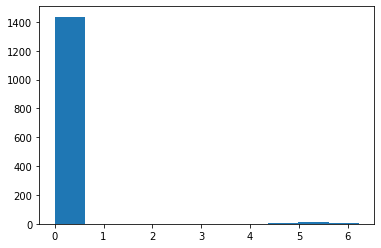

skewness from 10.293752357165413to 7.7296020390573705
ScreenPorch


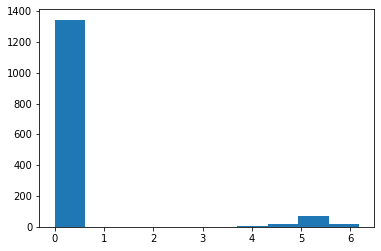

skewness from 4.1179773827954875to 3.147751902735081
PoolArea


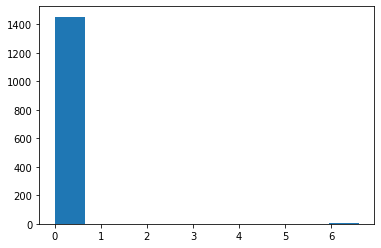

skewness from 14.813134660429398to 14.348382723513362
MiscVal


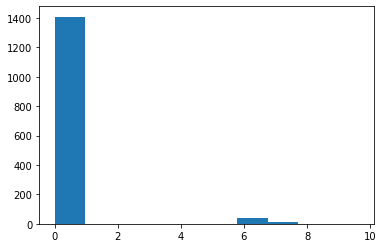

skewness from 24.4516396173223to 5.16591210200605
MoSold


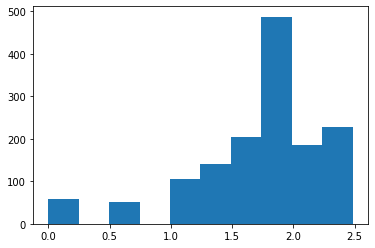

skewness from 0.2118350601903434to -1.3053444965886911
SalePrice


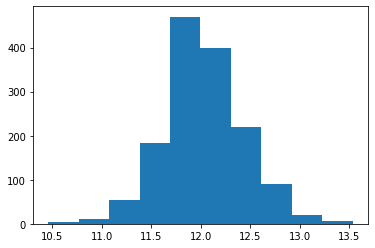

skewness from 1.880940746034036to 0.1212103673013655


In [92]:
arr_skew=[]
df=df_c_train.copy()
for feature in num_feature:
    skew1=scipy.stats.skew(df[feature])
    df[feature]=np.where(df[feature]==0,1,df[feature])
    df[feature]=np.log(df[feature])
    skew2=scipy.stats.skew(df[feature])
    print(feature)
    plt.hist(df[feature])
    plt.show()
    print("skewness from "+str(skew1)+"to "+str(skew2))
    if(skew1<skew2):
        arr_skew.append(feature)
for feature in arr_skew:
    df[feature]=np.where(df[feature]==0,0,df[feature])
    df[feature]=np.exp(df[feature])
    

In [93]:
arr_skew

['BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces']

In [94]:
new_outliers={}
for feature in num_feature:
    z_score=scipy.stats.zscore(df[feature])
    total_outliers=(((z_score>3).sum()+(z_score<-3).sum())/len(z_score))*100
    new_outliers[feature]=total_outliers

In [95]:
sum1=0
sum2=0
for key in outliers:
    sum1+=(outliers[key])
    sum2+=(new_outliers[key])

In [96]:
##Transforming rare categorical features

In [97]:
cat_nominal_feature.remove('Alley')
cat_nominal_feature.remove('MiscFeature')

In [98]:
df=df_c_train.copy()
for feature in cat_nominal_feature:
    categories=df[feature].value_counts().index.to_list()
    count=df[feature].value_counts().to_list()
    tot=df[feature].value_counts().sum()
    for i in range(len(categories)):
        perc=(count[i]/tot)*100
        if(perc<10):
            df[feature]=np.where(df[feature]==categories[i],'others',df[feature])

In [99]:
df_t=df_c_test.copy()
for feature in cat_nominal_feature:
    categories=df_t[feature].value_counts().index.to_list()
    count=df_t[feature].value_counts().to_list()
    tot=df_t[feature].value_counts().sum()
    for i in range(len(categories)):
        perc=(count[i]/tot)*100
        if(perc<10):
            df_t[feature]=np.where(df_t[feature]==categories[i],'others',df_t[feature])

MSZoning


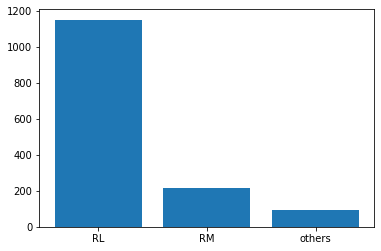

Street


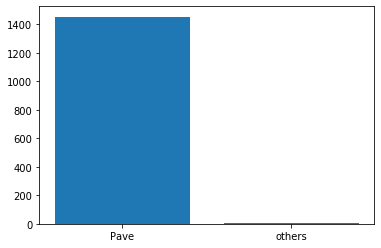

LandContour


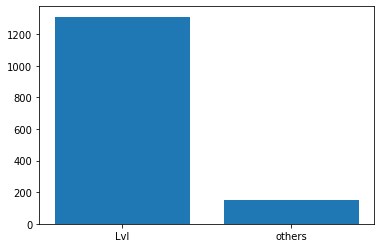

Utilities


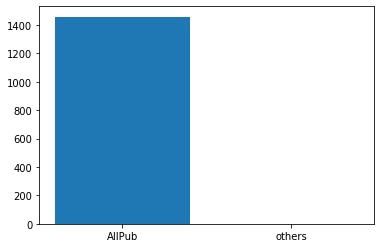

LotConfig


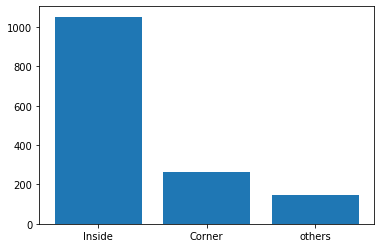

Neighborhood


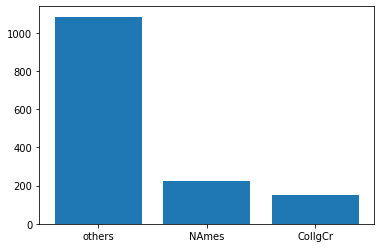

Condition1


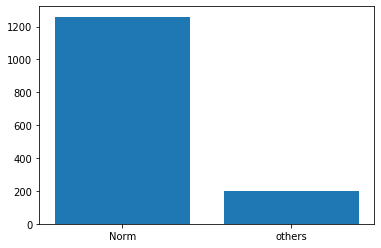

Condition2


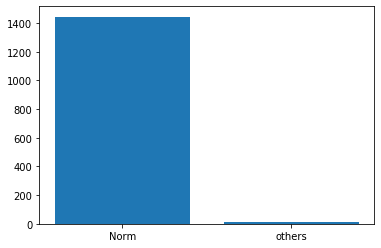

BldgType


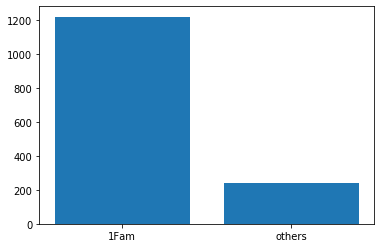

HouseStyle


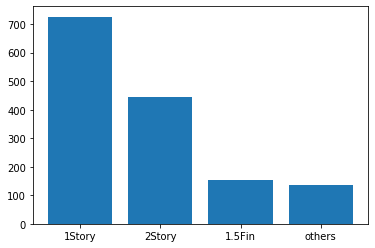

RoofStyle


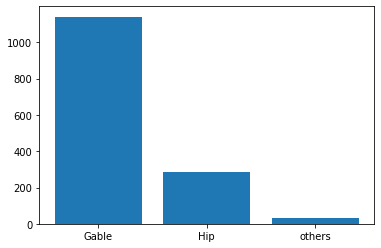

RoofMatl


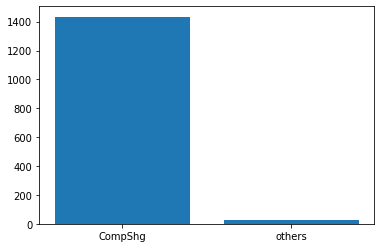

Exterior1st


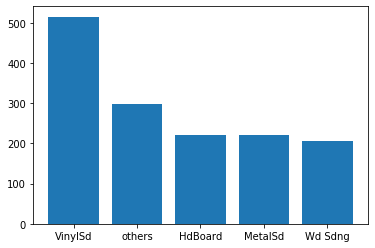

Exterior2nd


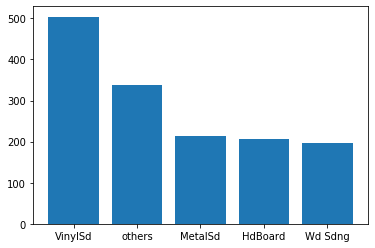

MasVnrType


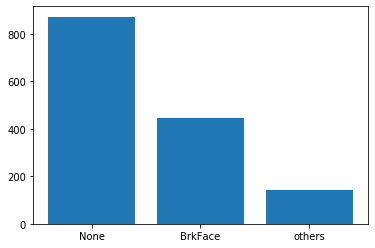

Foundation


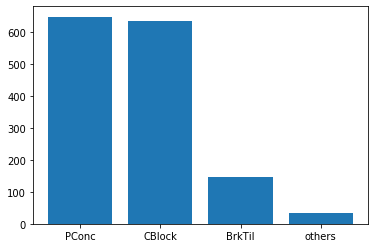

Heating


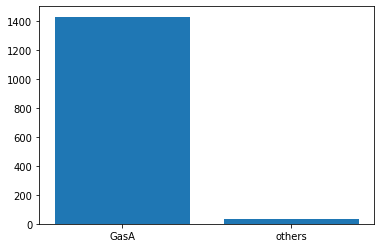

CentralAir


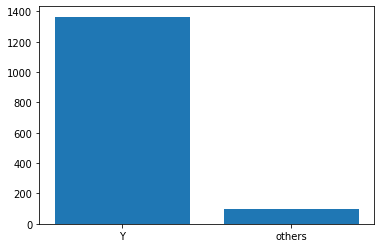

Electrical


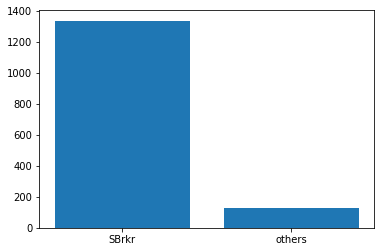

GarageType


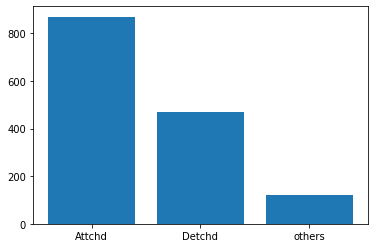

PavedDrive


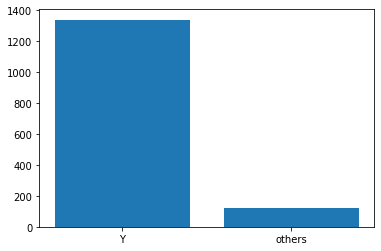

SaleType


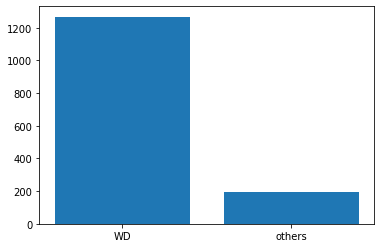

SaleCondition


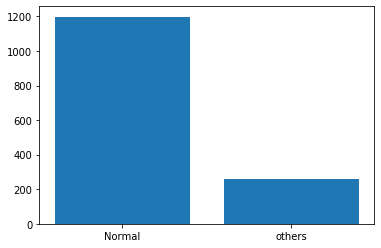

MSSubClass


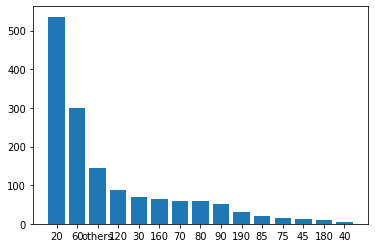

In [100]:
for feature in cat_nominal_feature:
    print(feature)
    plt.bar(df[feature].value_counts().index.to_list(),df[feature].value_counts().to_list())
    plt.show()

In [101]:
df[cat_nominal_feature]

,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,PavedDrive,SaleType,SaleCondition,MSSubClass
0,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,...,BrkFace,PConc,GasA,Y,SBrkr,Attchd,Y,WD,Normal,60
1,RL,Pave,Lvl,AllPub,others,others,others,Norm,1Fam,1Story,...,None,CBlock,GasA,Y,SBrkr,Attchd,Y,WD,Normal,20
2,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,...,BrkFace,PConc,GasA,Y,SBrkr,Attchd,Y,WD,Normal,60
3,RL,Pave,Lvl,AllPub,Corner,others,Norm,Norm,1Fam,2Story,...,None,BrkTil,GasA,Y,SBrkr,Detchd,Y,WD,others,70
4,RL,Pave,Lvl,AllPub,others,others,Norm,Norm,1Fam,2Story,...,BrkFace,PConc,GasA,Y,SBrkr,Attchd,Y,WD,Normal,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Lvl,AllPub,Inside,others,Norm,Norm,1Fam,2Story,...,None,PConc,GasA,Y,SBrkr,Attchd,Y,WD,Normal,60
1456,RL,Pave,Lvl,AllPub,Inside,others,Norm,Norm,1Fam,1Story,...,others,CBlock,GasA,Y,SBrkr,Attchd,Y,WD,Normal,20
1457,RL,Pave,Lvl,AllPub,Inside,others,Norm,Norm,1Fam,2Story,...,None,others,GasA,Y,SBrkr,Attchd,Y,WD,Normal,70
1458,RL,Pave,Lvl,AllPub,Inside,NAmes,Norm,Norm,1Fam,1Story,...,None,CBlock,GasA,Y,others,Attchd,Y,WD,Normal,20


In [102]:
from sklearn.preprocessing import OneHotEncoder

In [103]:
df_train_NCT=pd.get_dummies(df[cat_nominal_feature],drop_first=True)

In [104]:
df_test_NCT=pd.get_dummies(df_t[cat_nominal_feature],drop_first=True)

In [105]:
arr_notin=[]
for feature in df_train_NCT.columns:
    if(feature not in df_test_NCT.columns):
        arr_notin.append(feature)

In [106]:
df_train_NCT.drop(arr_notin,axis=1,inplace=True)

In [107]:
df_train_NT=df_c_train[num_feature]
from sklearn.preprocessing import StandardScaler

In [108]:
scaler=StandardScaler()

In [109]:
scaler.fit(df_train_NT)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [110]:
df_train_NT=pd.DataFrame(scaler.transform(df_train_NT),columns=num_feature)

In [111]:
num_feature.remove('SalePrice')

In [112]:
scaler.fit(df_c_test[num_feature])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [113]:
df_train_NT=pd.DataFrame(scaler.transform(df_c_train[num_feature]),columns=num_feature)

In [114]:
df_test_NT=pd.DataFrame(scaler.transform(df_c_test[num_feature]),columns=num_feature)

In [115]:
df_train_NT

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,-0.162166,-0.276385,0.915448,0.544397,0.586548,-0.297689,-0.925081,-0.429460,-0.755056,1.255826,...,0.301406,0.346824,-0.729632,0.184231,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.508059
1,0.567330,-0.044241,-0.362766,-0.563316,1.184401,-0.297689,-0.618422,0.487851,0.264969,-0.775254,...,0.301406,-0.058893,1.603943,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.405725
2,-0.016267,0.288836,0.868107,0.352243,0.102991,-0.297689,-0.275147,-0.284860,-0.594264,1.284366,...,0.301406,0.623450,-0.729632,-0.091692,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,1.064053
3,-0.405331,-0.054334,-0.646813,-0.563316,-0.490465,-0.297689,-0.032566,-0.655399,-0.491257,1.022751,...,1.591001,0.780204,-0.729632,-0.193348,3.686596,-0.088827,-0.301543,-0.057227,-0.092244,-1.508059
4,0.761862,0.896448,0.773424,1.414743,0.474451,-0.297689,-0.146991,0.223503,-0.028979,1.729110,...,1.591001,1.674626,0.773879,0.518243,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,2.166387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.308065,-0.383979,0.773424,-0.563316,-0.965230,-0.297689,0.912584,-0.210300,-0.511356,0.875296,...,0.301406,-0.058893,-0.729632,-0.120737,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,0.696608
1456,0.810495,0.677425,0.205329,0.109224,0.771179,0.625101,0.079570,1.120480,2.302507,-0.775254,...,0.301406,0.125524,2.003313,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.508059
1457,-0.113533,-0.156881,1.057472,-0.563316,-0.360784,-0.297689,0.738658,0.239319,0.079053,1.964563,...,-0.988189,-1.017861,-0.729632,0.169709,-0.360738,-0.088827,-0.301543,-0.057227,3.872293,-0.405725
1458,-0.016267,-0.020623,0.584059,-0.563316,-0.857529,5.527781,-1.268355,0.072124,-0.197309,-0.775254,...,-0.988189,-1.073186,2.136436,-0.701628,1.305811,-0.088827,-0.301543,-0.057227,-0.092244,-0.773170


In [116]:
df_c_train[cat_ordinal_feature]

,LotShape,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,LotShape
0,Reg,Gtl,7,5,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,Typ,missing,RFn,TA,TA,Reg
1,Reg,Gtl,6,8,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,Typ,TA,RFn,TA,TA,Reg
2,IR1,Gtl,7,5,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,Typ,TA,RFn,TA,TA,IR1
3,IR1,Gtl,7,5,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Typ,Gd,Unf,TA,TA,IR1
4,IR1,Gtl,8,5,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,Typ,TA,RFn,TA,TA,IR1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Gtl,6,5,TA,TA,Gd,TA,No,Unf,Unf,Ex,TA,Typ,TA,RFn,TA,TA,Reg
1456,Reg,Gtl,6,6,TA,TA,Gd,TA,No,ALQ,Rec,TA,TA,Min1,TA,Unf,TA,TA,Reg
1457,Reg,Gtl,7,9,Ex,Gd,TA,Gd,No,GLQ,Unf,Ex,Gd,Typ,Gd,RFn,TA,TA,Reg
1458,Reg,Gtl,5,6,TA,TA,TA,TA,Mn,GLQ,Rec,Gd,Gd,Typ,missing,Unf,TA,TA,Reg


In [117]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [118]:
enc_arr=[]
for feature in cat_ordinal_feature:
    arr=encoder.fit_transform(df_c_train[feature])
    enc_arr.append(arr)

In [119]:
enc_arr_t=[]
for feature in cat_ordinal_feature:
    arr=encoder.fit_transform(df_c_test[feature])
    enc_arr_t.append(arr)

In [120]:
df_train_OCT=pd.DataFrame(np.array(enc_arr).T,columns=cat_ordinal_feature)

In [121]:
df_test_OCT=pd.DataFrame(np.array(enc_arr_t).T,columns=cat_ordinal_feature)

In [122]:
df_test_OCT

,LotShape,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,LotShape
0,3,0,4,5,3,4,3,3,3,4,3,4,3,6,5,2,3,4,3
1,0,0,5,5,3,4,3,3,3,0,5,4,2,6,5,2,3,4,0
2,0,0,4,4,3,4,2,3,3,2,5,2,3,6,4,0,3,4,0
3,0,0,5,5,3,4,3,3,3,2,5,0,2,6,2,0,3,4,0
4,0,0,7,4,2,4,2,3,3,0,5,0,2,6,5,1,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,0,3,6,3,4,3,3,3,5,5,2,3,6,5,2,3,4,3
1455,3,0,3,4,3,4,3,3,3,4,5,4,3,6,5,2,3,4,3
1456,3,0,4,6,3,4,3,3,3,0,5,0,3,6,4,2,3,4,3
1457,3,0,4,4,3,4,2,3,0,2,5,4,3,6,5,2,3,4,3


In [123]:
year_feature.remove('GarageYrBlt')

In [124]:
df_c_train[year_feature]

,YearBuilt,YrSold,YearRemodAdd
0,2003,2008,2003
1,1976,2007,1976
2,2001,2008,2002
3,1915,2006,1970
4,2000,2008,2000
...,...,...,...
1455,1999,2007,2000
1456,1978,2010,1988
1457,1941,2010,2006
1458,1950,2010,1996


In [125]:
YearOld=np.array((df_c_train['YrSold']-df_c_train["YearBuilt"]).to_list())
df_train_YT=pd.DataFrame(YearOld,columns=['timeSold'])

In [126]:
YearOld_t=np.array((df_c_test['YrSold']-df_c_test["YearBuilt"]).to_list())
df_test_YT=pd.DataFrame(YearOld_t,columns=['timeSold'])

In [127]:
list_yearR=(df_c_train['YearRemodAdd']-df_c_train['YearBuilt']).to_list()
for i in range(len(list_yearR)):
    if list_yearR[i]==0:
        list_yearR[i]=0
    else:
        list_yearR[i]=1

In [128]:
Rem=pd.DataFrame(np.array(list_yearR),columns=['Remodded'])
df_train_YT=pd.concat([df_train_YT,Rem],axis=1)

In [129]:
list_yearR_t=(df_c_test['YearRemodAdd']-df_c_test['YearBuilt']).to_list()
for i in range(len(list_yearR_t)):
    if list_yearR_t[i]==0:
        list_yearR_t[i]=0
    else:
        list_yearR_t[i]=1
Rem_t=pd.DataFrame(np.array(list_yearR_t),columns=['Remodded'])
df_test_YT=pd.concat([df_test_YT,Rem_t],axis=1)

In [130]:
df_train_YT['timeSold']=pd.DataFrame(np.where(df_train_YT['timeSold']==0,1,df_train_YT['timeSold']))

In [131]:
df_train_YT['timeSold']=np.log(df_train_YT['timeSold'])

In [132]:
df_train_NT=pd.concat([df_train_NT,df_train_YT.drop('Remodded',axis=1)],axis=1)

In [133]:
df_train_NCT=pd.concat([df_train_NCT,df_train_YT.drop('timeSold',axis=1)],axis=1)

In [134]:
df_train_CT=pd.concat([df_train_NCT,df_train_OCT],axis=1)

In [135]:
df_test_NT=pd.concat([df_test_NT,df_test_YT.drop('Remodded',axis=1)],axis=1)
df_test_NCT=pd.concat([df_test_NCT,df_test_YT.drop('timeSold',axis=1)],axis=1)
df_test_CT=pd.concat([df_test_NCT,df_test_OCT],axis=1)

In [136]:
for columns in df_test_CT.columns:
    if columns not in df_train_CT.columns:
        print(columns)

MSSubClass_150


In [137]:
df_test_CT=df_test_CT.drop(['MSSubClass_150'],axis=1)

In [138]:
scaler.fit(df_train_NT)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [139]:
df_train_NT=pd.DataFrame(scaler.transform(df_train_NT),columns=df_train_NT.columns)

In [140]:
df_test_NT=pd.DataFrame(scaler.transform(df_test_NT),columns=df_test_NT.columns)

In [141]:
df_train_T=pd.concat([df_train_NT,df_train_CT],axis=1)
df_test_T=pd.concat([df_test_NT,df_test_CT],axis=1)

In [149]:
target=np.log(pd.DataFrame(np.where(target_feature==0,1,target_feature),columns=['SalePrice']))

In [150]:
df_train_NT

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,timeSold
0,-0.220875,-0.207142,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-0.924901
1,0.460320,-0.091886,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,0.338390
2,-0.084636,0.073480,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,-0.691933
3,-0.447940,-0.096897,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.084001
4,0.641972,0.375148,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,-0.599478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.357114,-0.260560,0.733308,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.599478
1456,0.687385,0.266407,0.151865,0.087911,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.360372
1457,-0.175462,-0.147810,1.024029,-0.570750,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,0.892381
1458,-0.084636,-0.080160,0.539493,-0.570750,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,0.795612


In [152]:
df_train_NT.to_csv("N_train.csv")
df_test_NT.to_csv("N_test.csv")
target.to_csv("target.csv")
df_train_CT.to_csv("C_train.csv")
df_test_CT.to_cv("C_test.csv")

AttributeError: 'DataFrame' object has no attribute 'to_cv'